In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
from processing_functions import *
import collections

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [114]:
np.minimum(np.array((2,3)),np.array([[3,4],[3,2]]))

array([[2, 3],
       [2, 2]])

In [2]:
param_list = [r'$\alpha$', r'$\log{M_\mathrm{1}}$', r'$\sigma_{\log{M}}$', r'$\log{M_\mathrm{0}}$', r'$\log{M_{\rm{min}}}$',\
              r'$A_{\rm{cen}}$', r'$A_{\rm{sat}}$']

In [64]:
%store -r
%store

Stored variables and their in-db values:
df_19p0                      -> array([[  1.48348800e-04,  -1.20067517e+02,  -1.16
df_19p5                      -> array([[ -1.16710400e-04,  -9.47198564e+01,  -9.86
df_20p0                      -> array([[ -1.07541333e-05,  -7.42548147e+01,  -7.02
df_20p5                      -> array([[  6.91242667e-05,  -5.74231567e+01,  -6.32
dfdp_19p0                    -> array([[  1.35133798e-03,   1.23037870e+03,   1.15
dfdp_19p5                    -> array([[  1.55407182e-03,   9.55283760e+02,   8.79
dfdp_20p0                    -> array([[  3.03894713e-04,   7.88697467e+02,   7.84
dfdp_20p5                    -> array([[ -2.18459194e-04,   4.91082302e+02,   4.79
dp_19p0                      -> array([[-0.15      , -0.14849246, -0.14698492, ...
dp_19p5                      -> array([[-0.15      , -0.14849246, -0.14698492, ...
dp_20p0                      -> array([[-0.15      , -0.14849246, -0.14698492, ...
dp_20p5                      -> array([[-0.15 

In [105]:
r_wp = np.logspace(-1,1.5,30)
r_wp = (r_wp[1:]+r_wp[:-1])/2.

r_ds = np.logspace(-1,1.5,31)
r_ds = np.sqrt(0.5*(r_ds[1:]**2 + r_ds[:-1]**2))

r_vpf = np.logspace(0,1,30)

cic_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(150),30-10)).astype(np.int)])
cia_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(200),30-10)).astype(np.int)])

ratio_bin = np.linspace(0,1,31)

obs_list = [r'$n_{\mathrm{gal}}$',]+\
            list([r'$w_{\mathrm{p}}(r_{\mathrm{p}}= %.2f h^{-1}\mathrm{Mpc})$'%r for r in r_wp])+\
            list([r'$\Delta \Sigma(r_{\mathrm{p}}=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_ds])+\
            list([r'$\mathrm{VPF}(r=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_vpf])+\
            list([r'$P(N_{\mathrm{CIC}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIC}}<%d)$'%(cic_bin[i],cic_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIC}} \geq %d)$'%cic_bin[-1],]+\
            list([r'$P(N_{\mathrm{CIA}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIA}}<%d)$'%(cia_bin[i],cia_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIA}} \geq %d)$'%cia_bin[-1],]+\
            list([r'$P(%.3f<N_2/N_5<%.3f)$'%(ratio_bin[i],ratio_bin[i+1]) for i in range(30)])

def plot_diagnostic(i,j,save=0):
    fig = plt.figure(figsize=(13,10))
    plt.xlabel(param_list[i],fontsize=30)
    plt.ylabel(obs_list[j],fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.plot(dp_19p0[i],df_19p0[Nparam*i:Nparam*i+Nparam,j]-df_19p0[Nparam*i+Nparam/2,j],\
             c=cm.YlGnBu(250),lw=2.5,label=r'$-19.0, slope/\sqrt{C_{jj}}=%.2f$'%(dfdp_19p0[i,j]/sqrtcovdiag_19p0[j]))
    #plt.plot(dp_19p0[i],dp_19p0[i]*dfdp_19p0[i,j],'--',c=cm.YlGnBu(250),lw=2.5)
    plt.axvline(0,c='k',ls='--')
    plt.axvspan(-gcv_alpha_19p0[i,j]*oneside_ranges[0,i],gcv_alpha_19p0[i,j]*oneside_ranges[0,i],ymin=0,ymax=0.25,color=cm.YlGnBu(250),alpha=0.3)

    plt.plot(dp_19p5[i],df_19p5[Nparam*i:Nparam*i+Nparam,j]-df_19p5[Nparam*i+Nparam/2,j],\
             c=cm.YlGnBu(180),lw=2.5,label=r'$-19.5, slope/\sqrt{C_{jj}}=%.2f$'%(dfdp_19p5[i,j]/sqrtcovdiag_19p5[j]))
    #plt.plot(dp_19p5[i],dp_19p5[i]*dfdp_19p5[i,j],'--',c=cm.YlGnBu(180),lw=2.5)
    plt.axvline(0,c='k',ls='--')
    plt.axvspan(-gcv_alpha_19p5[i,j]*oneside_ranges[1,i],gcv_alpha_19p5[i,j]*oneside_ranges[1,i],ymin=0.25,ymax=0.5,color=cm.YlGnBu(180),alpha=0.3)

    plt.plot(dp_20p0[i],df_20p0[Nparam*i:Nparam*i+Nparam,j]-df_20p0[Nparam*i+Nparam/2,j],\
             c=cm.YlGnBu(120),lw=2.5,label=r'$-20.0, slope/\sqrt{C_{jj}}=%.2f$'%(dfdp_20p0[i,j]/sqrtcovdiag_20p0[j]))
    #plt.plot(dp_20p0[i],dp_20p0[i]*dfdp_20p0[i,j],'--',c=cm.YlGnBu(120),lw=2.5)
    plt.axvline(0,c='k',ls='--')
    plt.axvspan(-gcv_alpha_20p0[i,j]*oneside_ranges[2,i],gcv_alpha_20p0[i,j]*oneside_ranges[2,i],ymin=0.5,ymax=0.75,color=cm.YlGnBu(120),alpha=0.3)

    plt.plot(dp_20p5[i],df_20p5[Nparam*i:Nparam*i+Nparam,j]-df_20p5[Nparam*i+Nparam/2,j],\
             c=cm.YlGnBu(60),lw=2.5,label=r'$-20.5, slope/\sqrt{C_{jj}}=%.2f$'%(dfdp_20p5[i,j]/sqrtcovdiag_20p5[j]))
    #plt.plot(dp_20p5[i],dp_20p5[i]*dfdp_20p5[i,j],'--',c=cm.YlGnBu(60),lw=2.5)
    plt.axvline(0,c='k',ls='--')
    plt.axvspan(-gcv_alpha_20p5[i,j]*oneside_ranges[3,i],gcv_alpha_20p5[i,j]*oneside_ranges[3,i],ymin=0.75,ymax=1,color=cm.YlGnBu(60),alpha=0.3)

    plt.legend(frameon=False,fontsize=20)
    if save:
        fig.savefig('Diagnostic_plots_102218/p'+str(i)+'_f'+str(j)+'.png')
        plt.close(fig)

In [107]:
for i in range(7):
    for j in range(180):
        plot_diagnostic(i,j,save=1)

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in double_scalars


In [77]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

In [5]:
comblist = [r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)$',\
            r'$\rm{CIC}$',r'$\rm{CIA}$',r'$P(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$\rm{CIC}+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}$',r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+P(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+P(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}+P(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)+$'+'\n'+r'$\rm{CIC}+\rm{CIA}+P(N_{\mathrm{1}}/N_{\mathrm{2}})$']

In [6]:
combidx = [0,1,6,21,3,4,5,18,8,9,10,28,29,30,62]
np.array(keylist)[combidx]

array(['w', 'd', 'wd', 'wdv', 'c', 'a', 'r', 'ca', 'wc', 'wa', 'wr', 'wca',
       'wcr', 'war', 'wdvcar'],
      dtype='|S6')

In [7]:
sigmalist_19p0 = []
sigmalist_19p5 = []
sigmalist_20p0 = []
sigmalist_20p5 = []
sigmalist_21p0 = []

for k in keylist:
    sigmalist_19p0.append(sigma_cut_19p0[k])
    sigmalist_19p5.append(sigma_cut_19p5[k])
    sigmalist_20p0.append(sigma_cut_20p0[k])
    sigmalist_20p5.append(sigma_cut_20p5[k])
    sigmalist_21p0.append(sigma_cut_21p0[k])
    
sigmalist_19p0 = np.array(sigmalist_19p0)
sigmalist_19p5 = np.array(sigmalist_19p5)
sigmalist_20p0 = np.array(sigmalist_20p0)
sigmalist_20p5 = np.array(sigmalist_20p5)
sigmalist_21p0 = np.array(sigmalist_21p0)

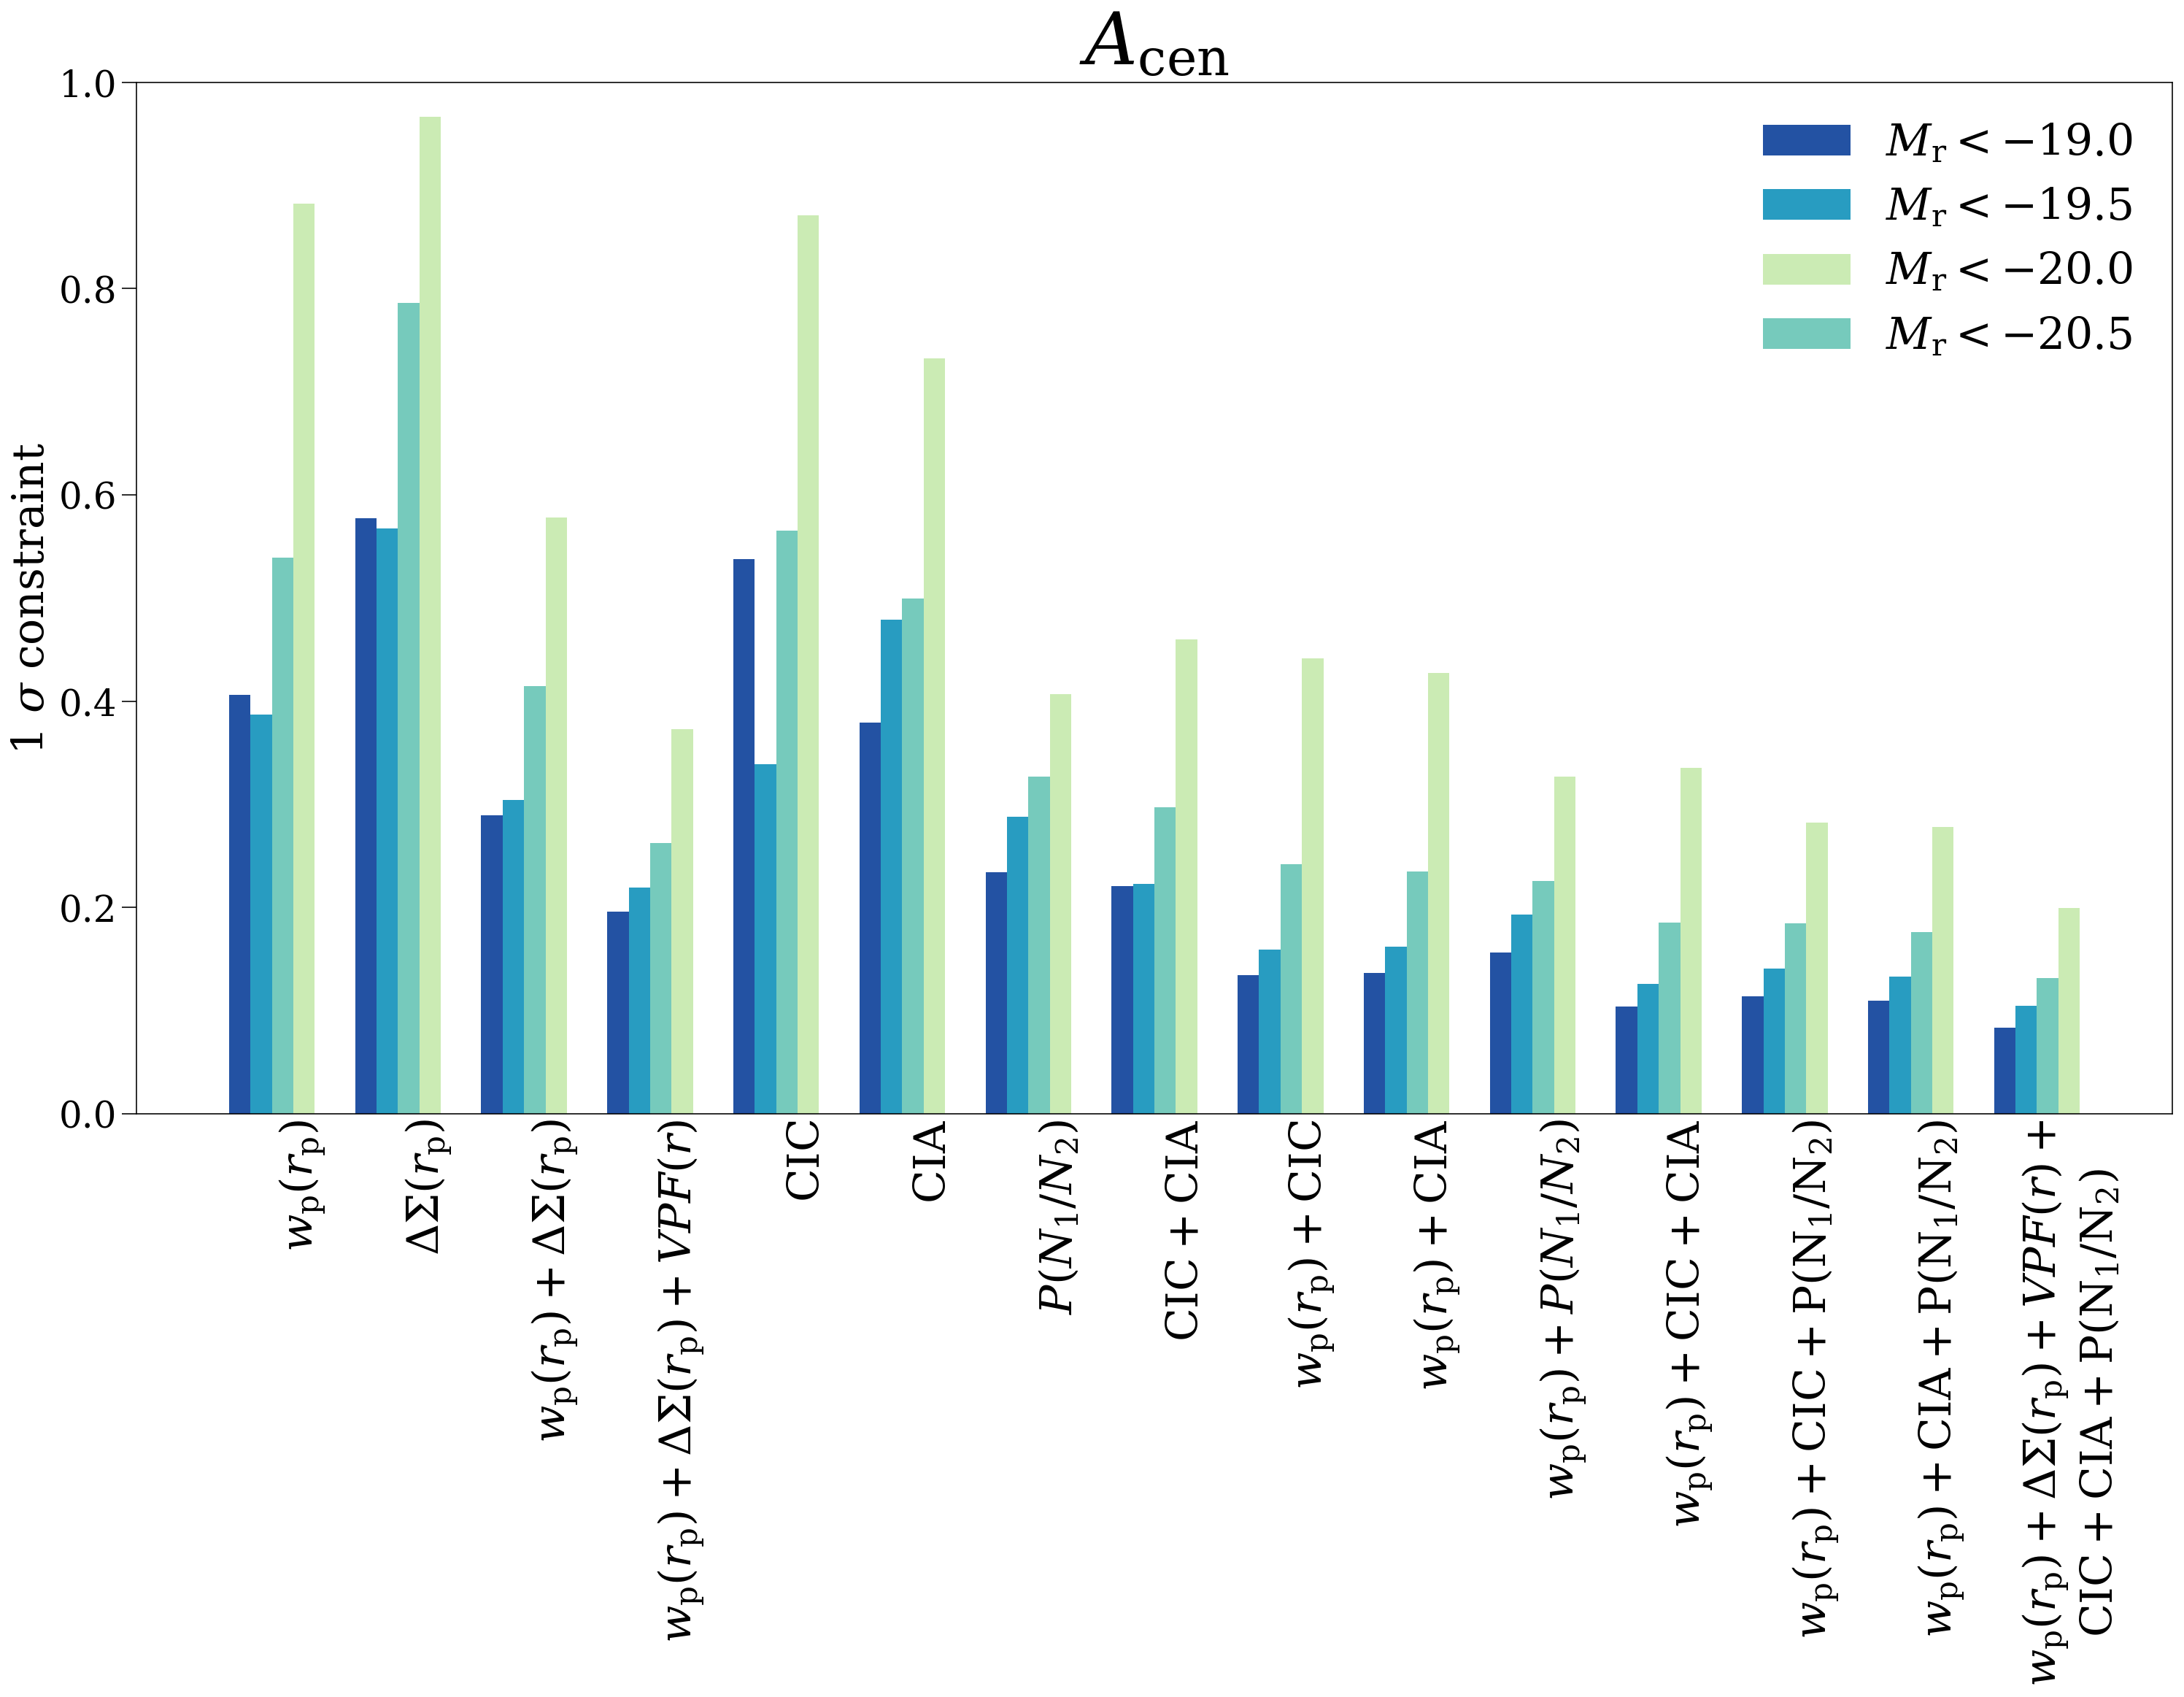

In [40]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,5], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,5], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,5], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,5], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[5],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects4[0], rects3[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.0)

plt.show()

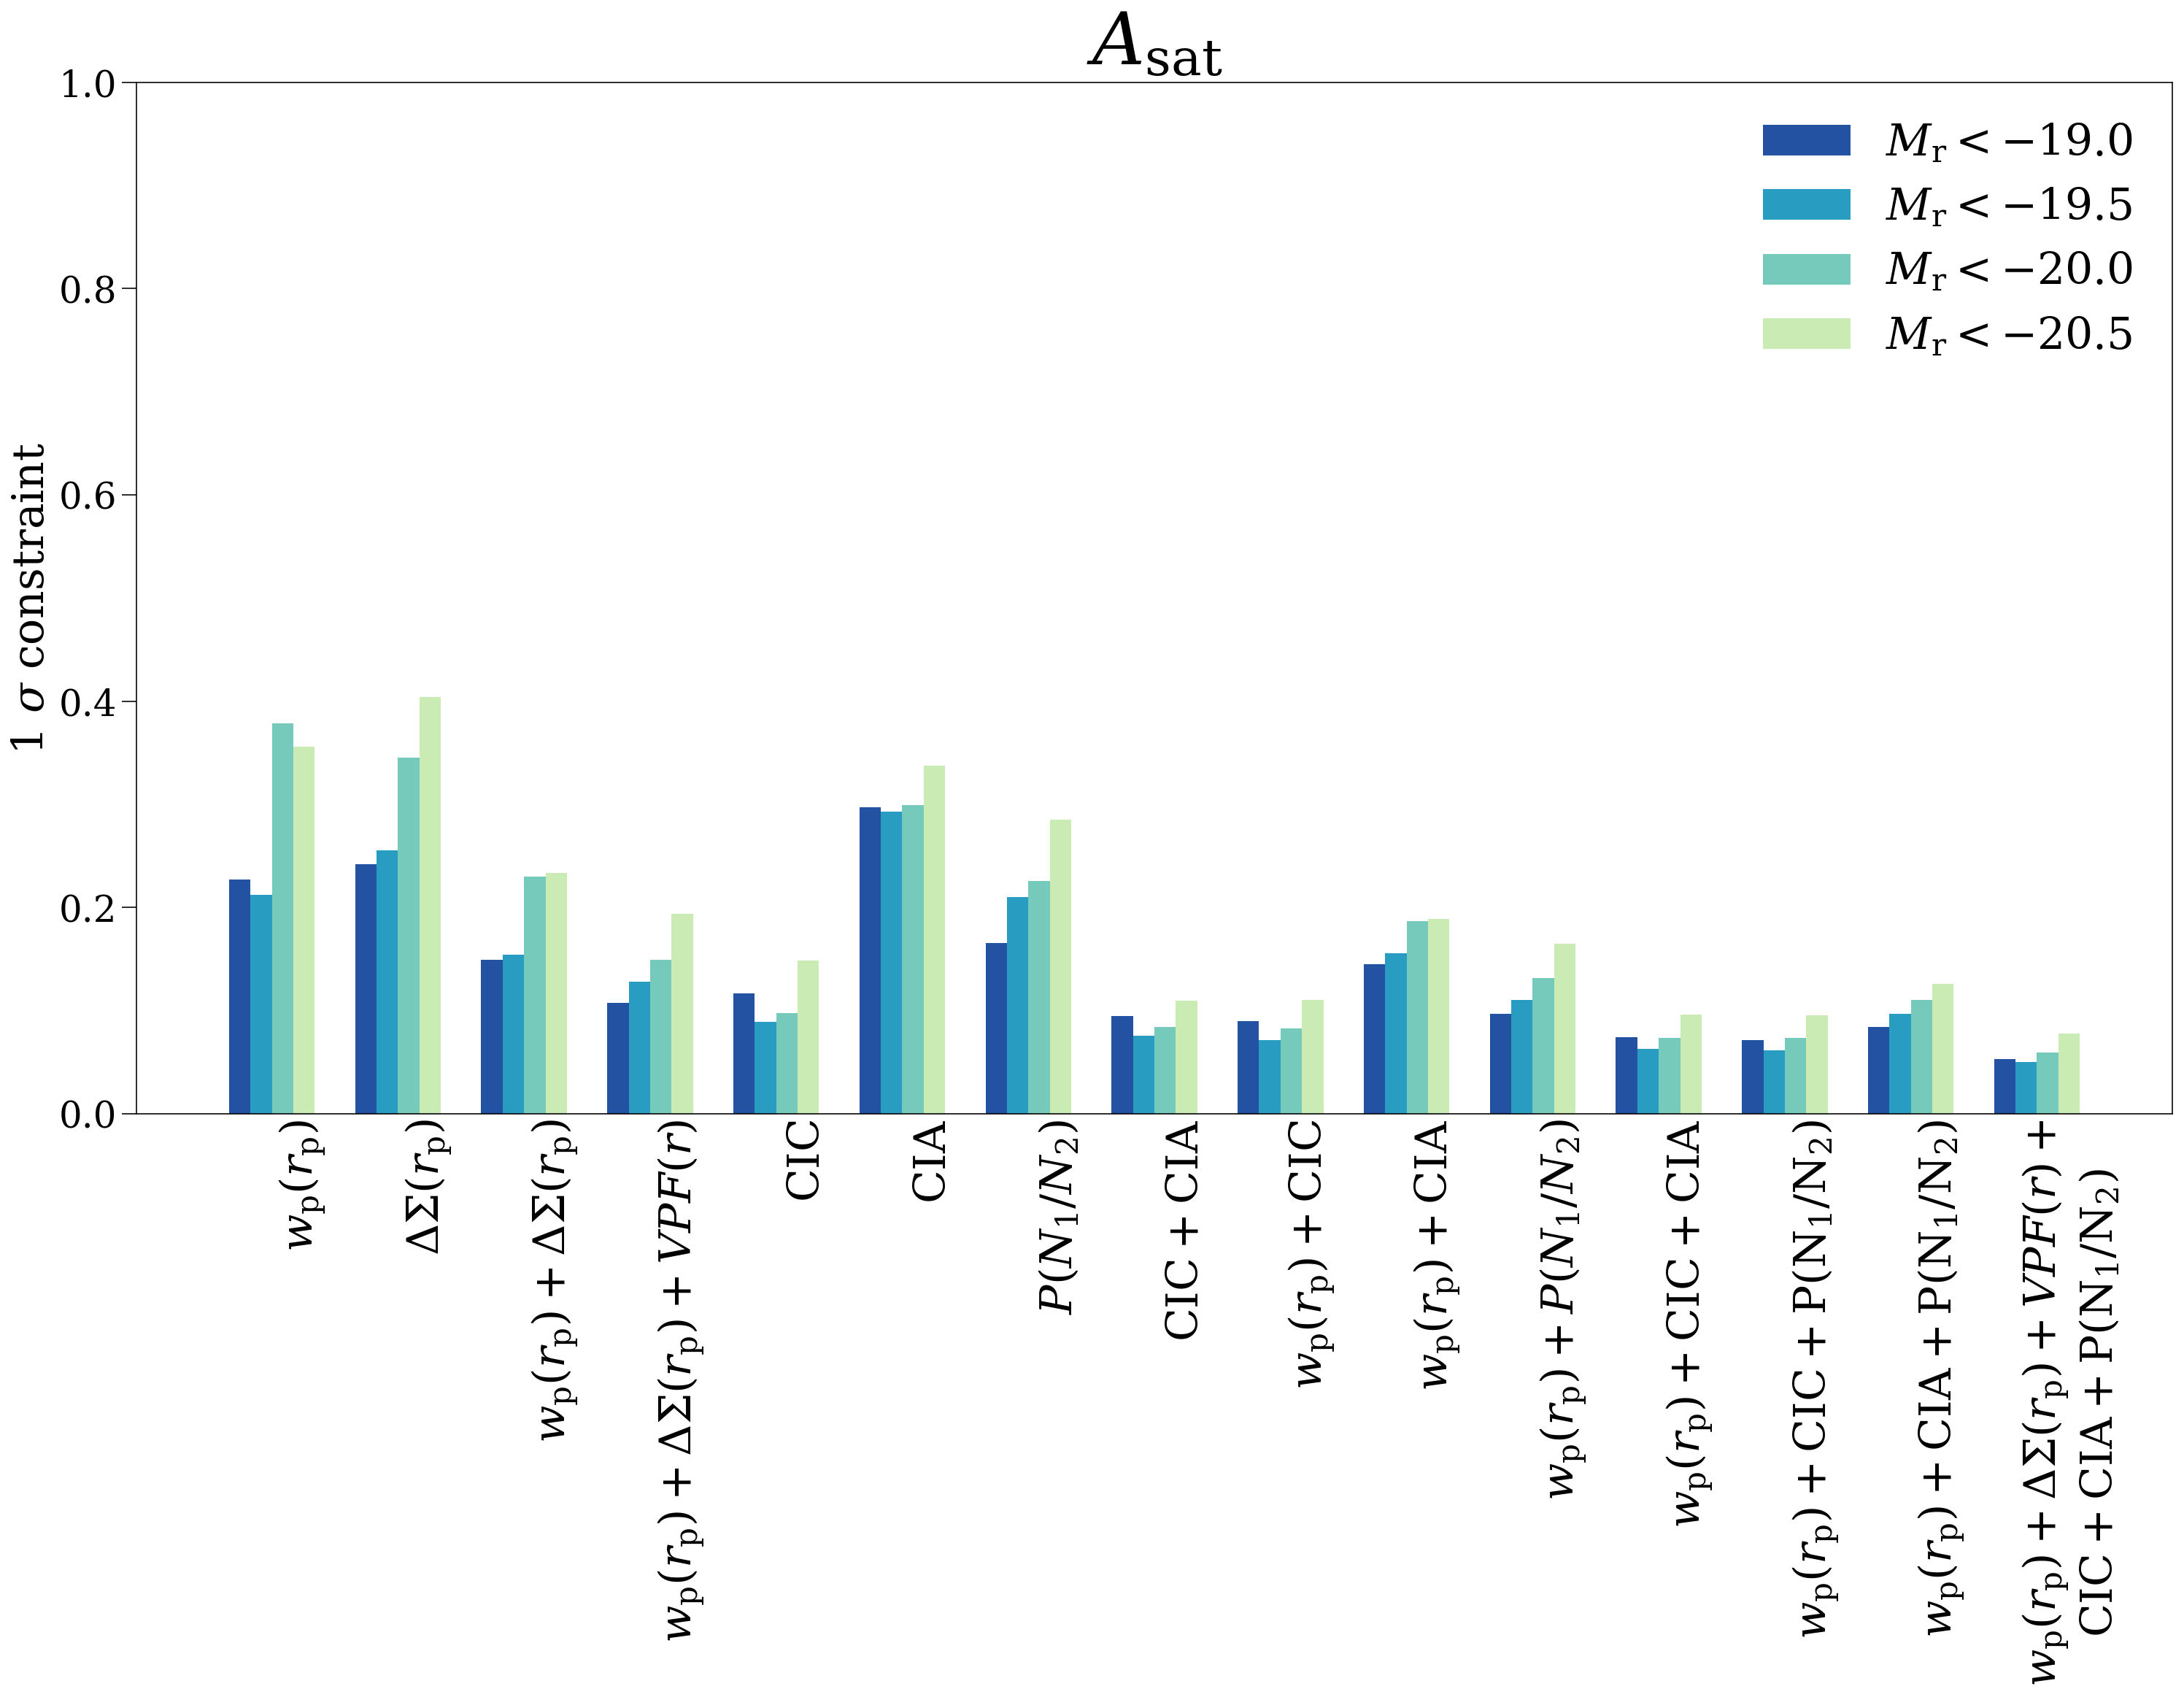

In [41]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,6], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,6], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,6], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,6], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[6],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.0)

plt.show()

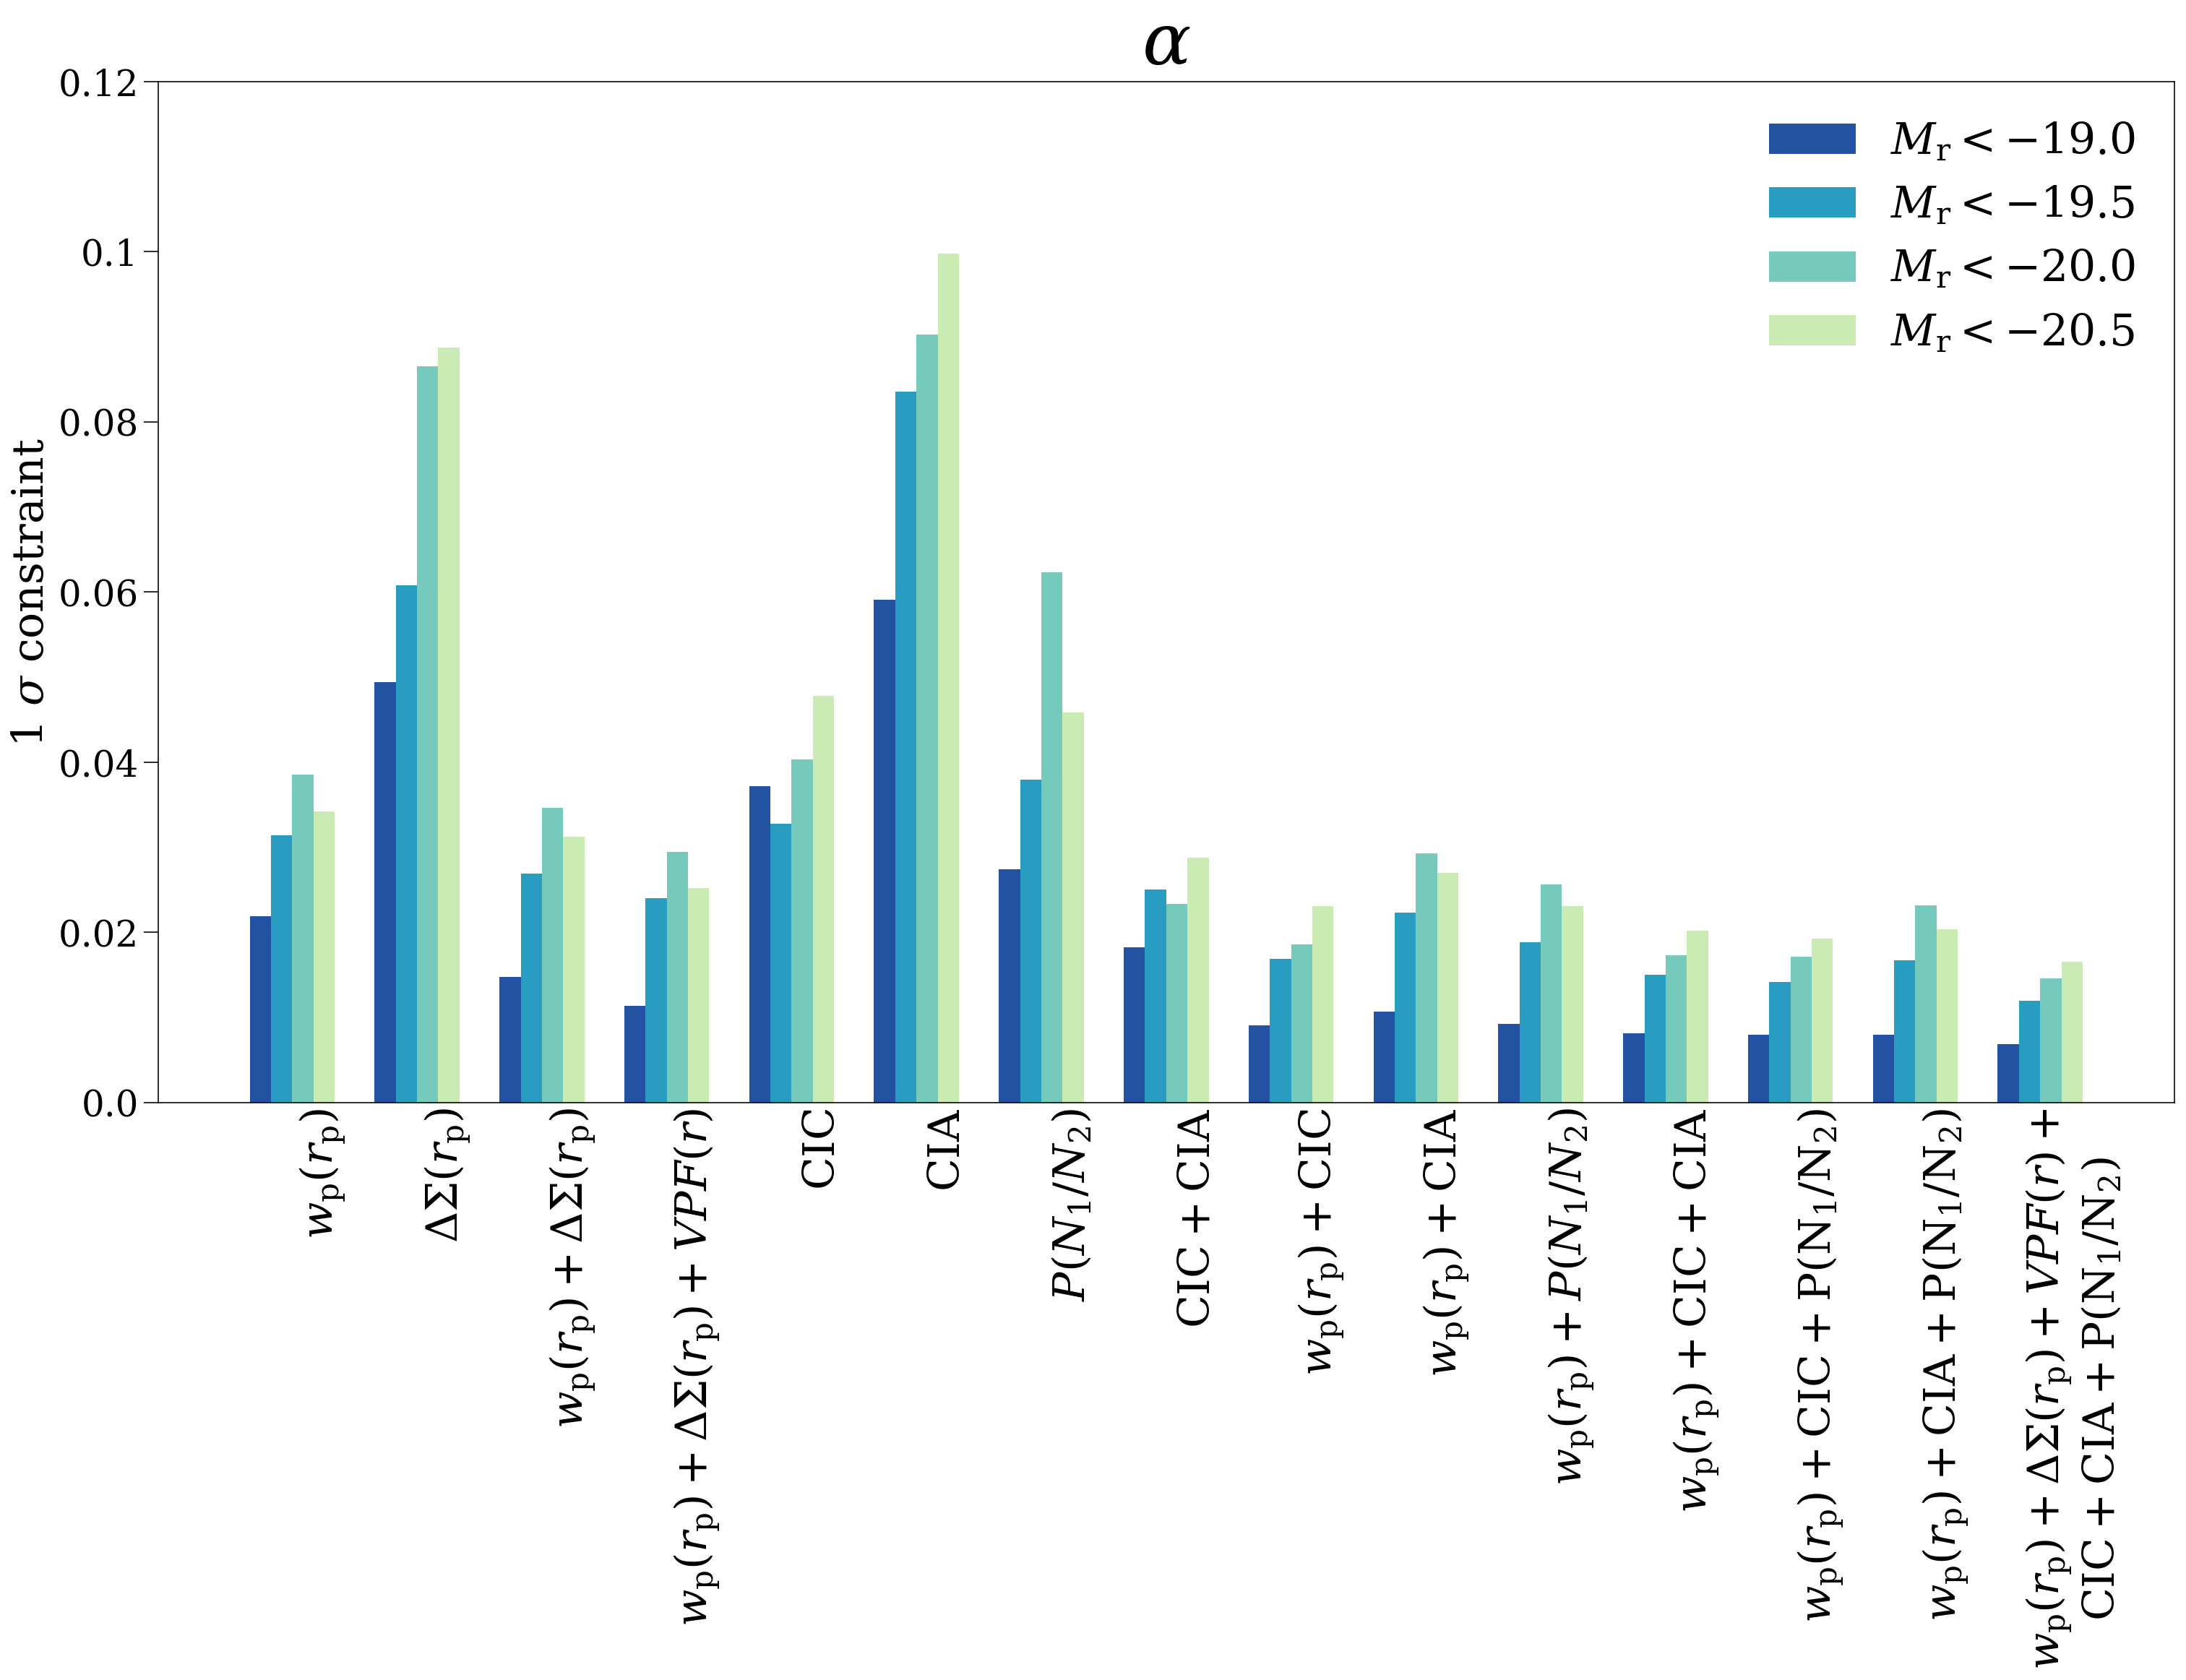

In [47]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,0], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,0], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,0], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,0], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[0],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.02,0.04,0.06,0.08,0.10,0.12],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.12)

plt.show()

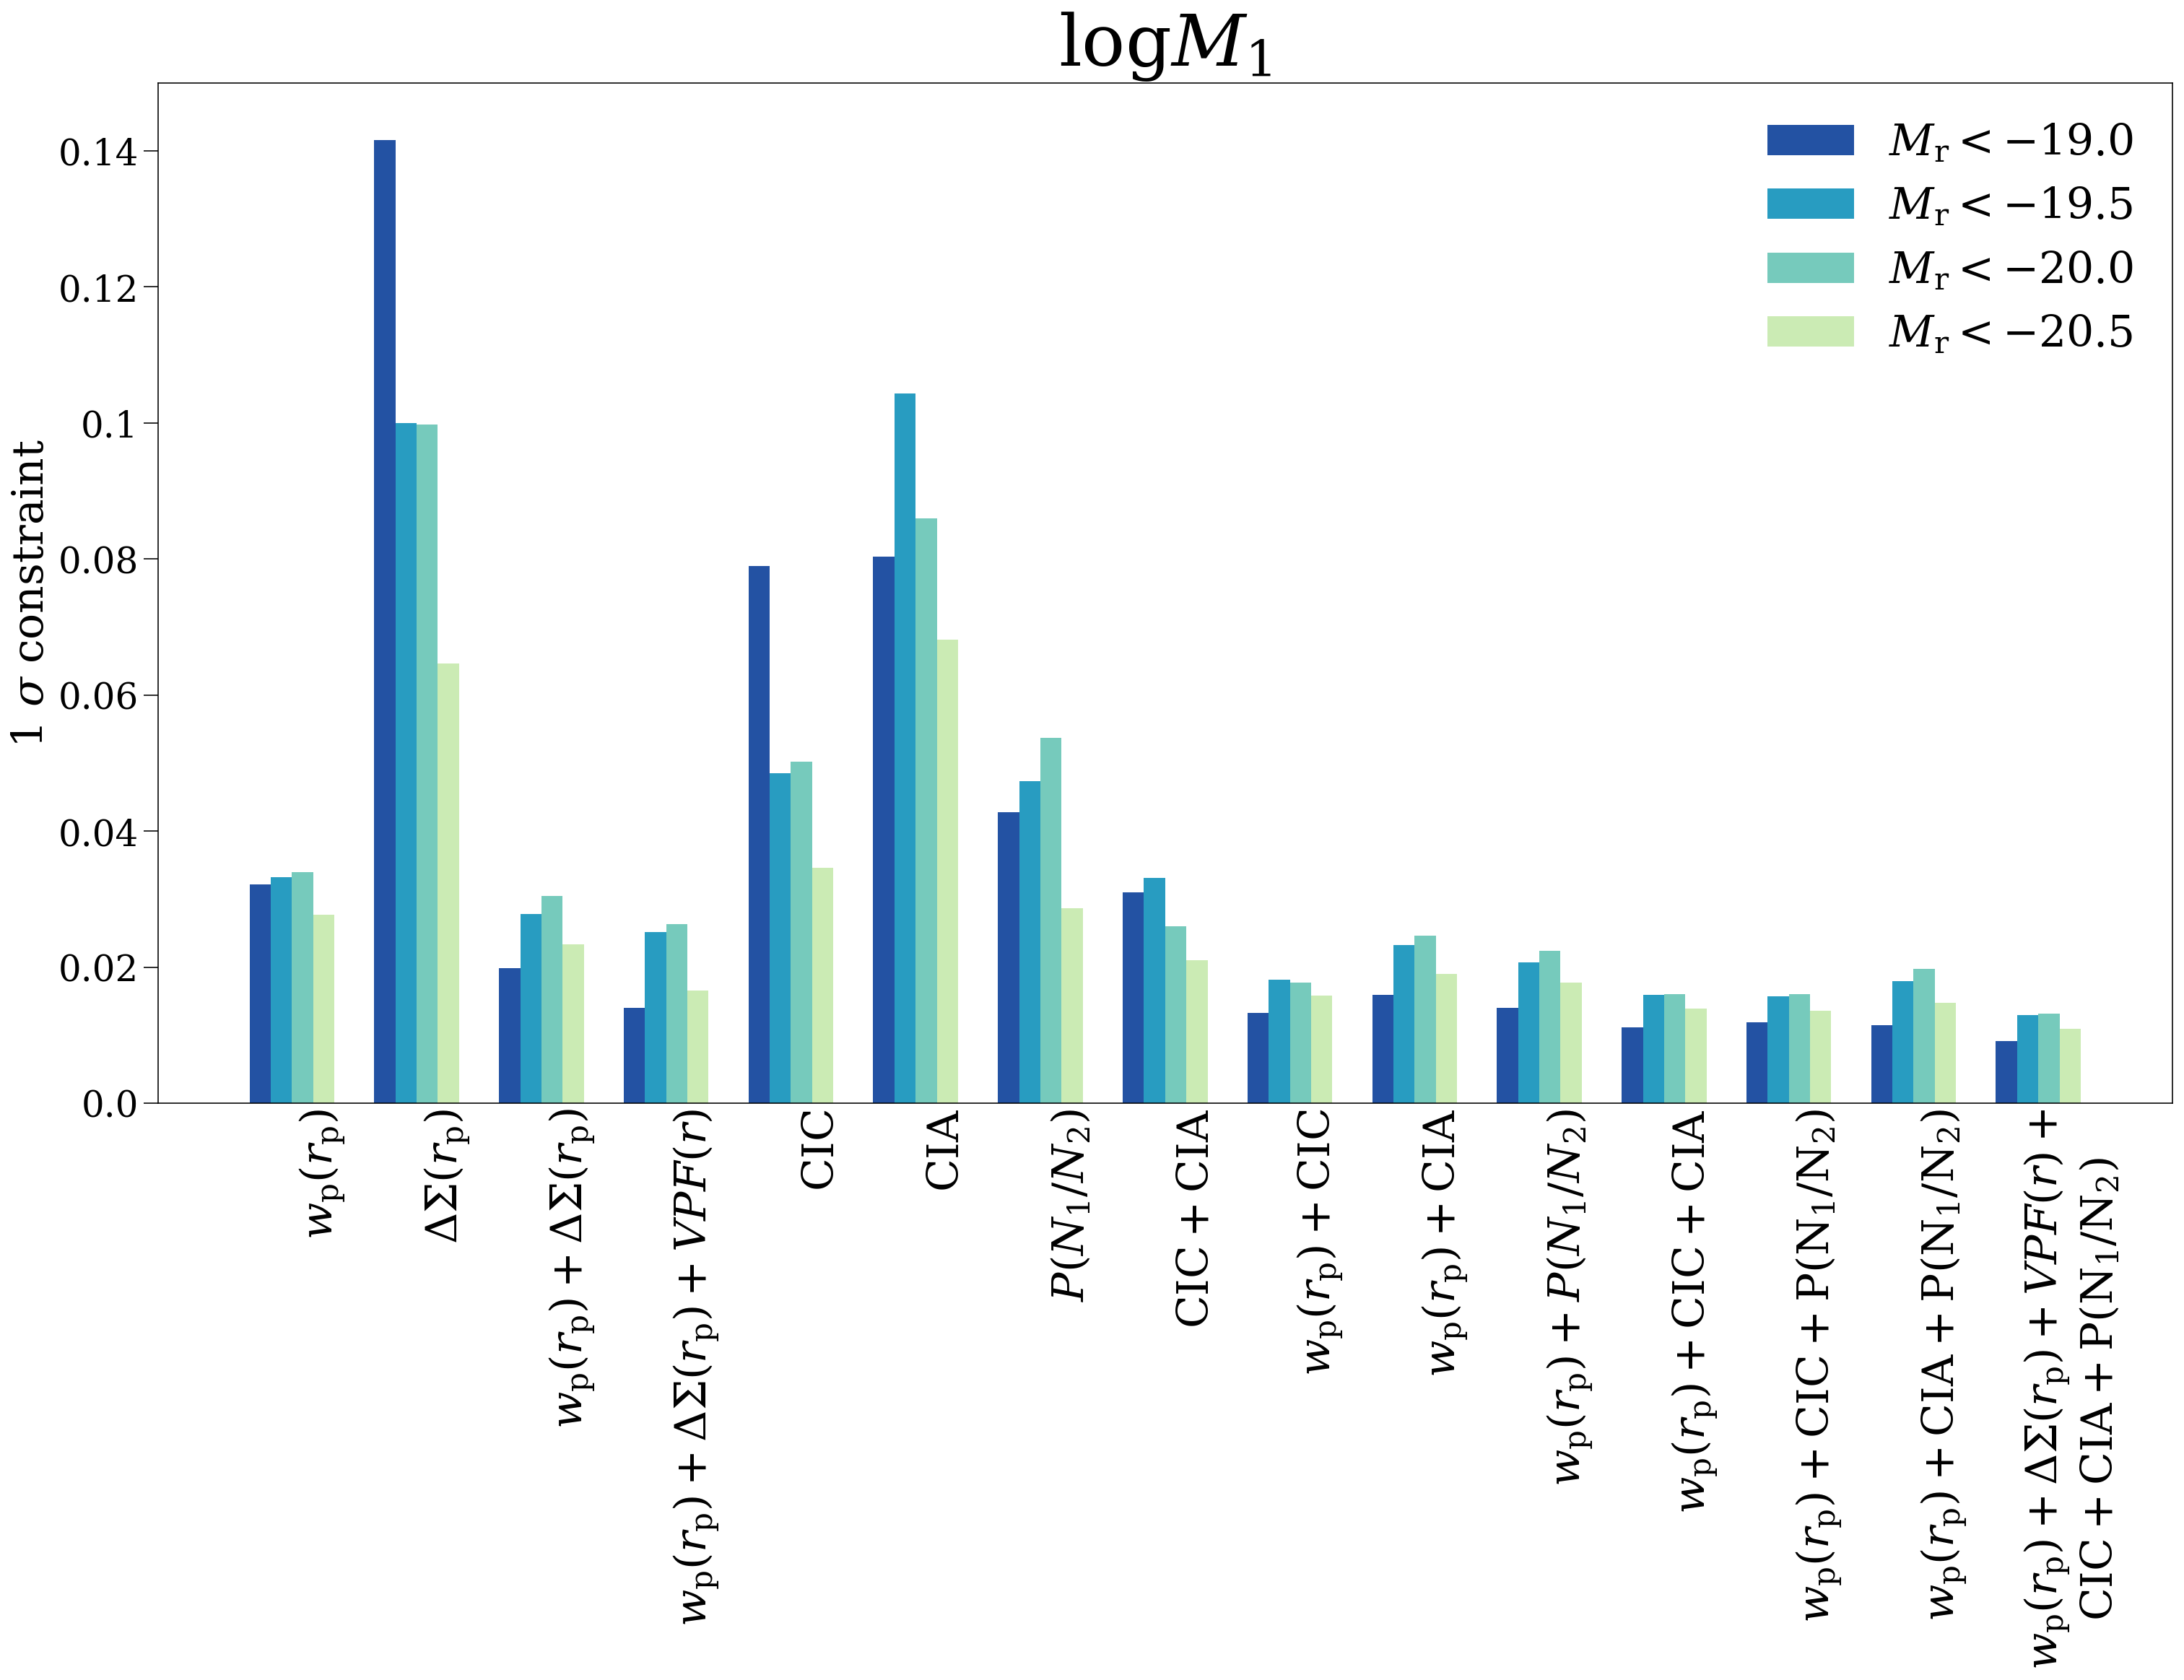

In [46]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,1], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,1], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,1], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,1], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[1],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.02,0.04,0.06,0.08,0.10,0.12,0.14],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.15)

plt.show()

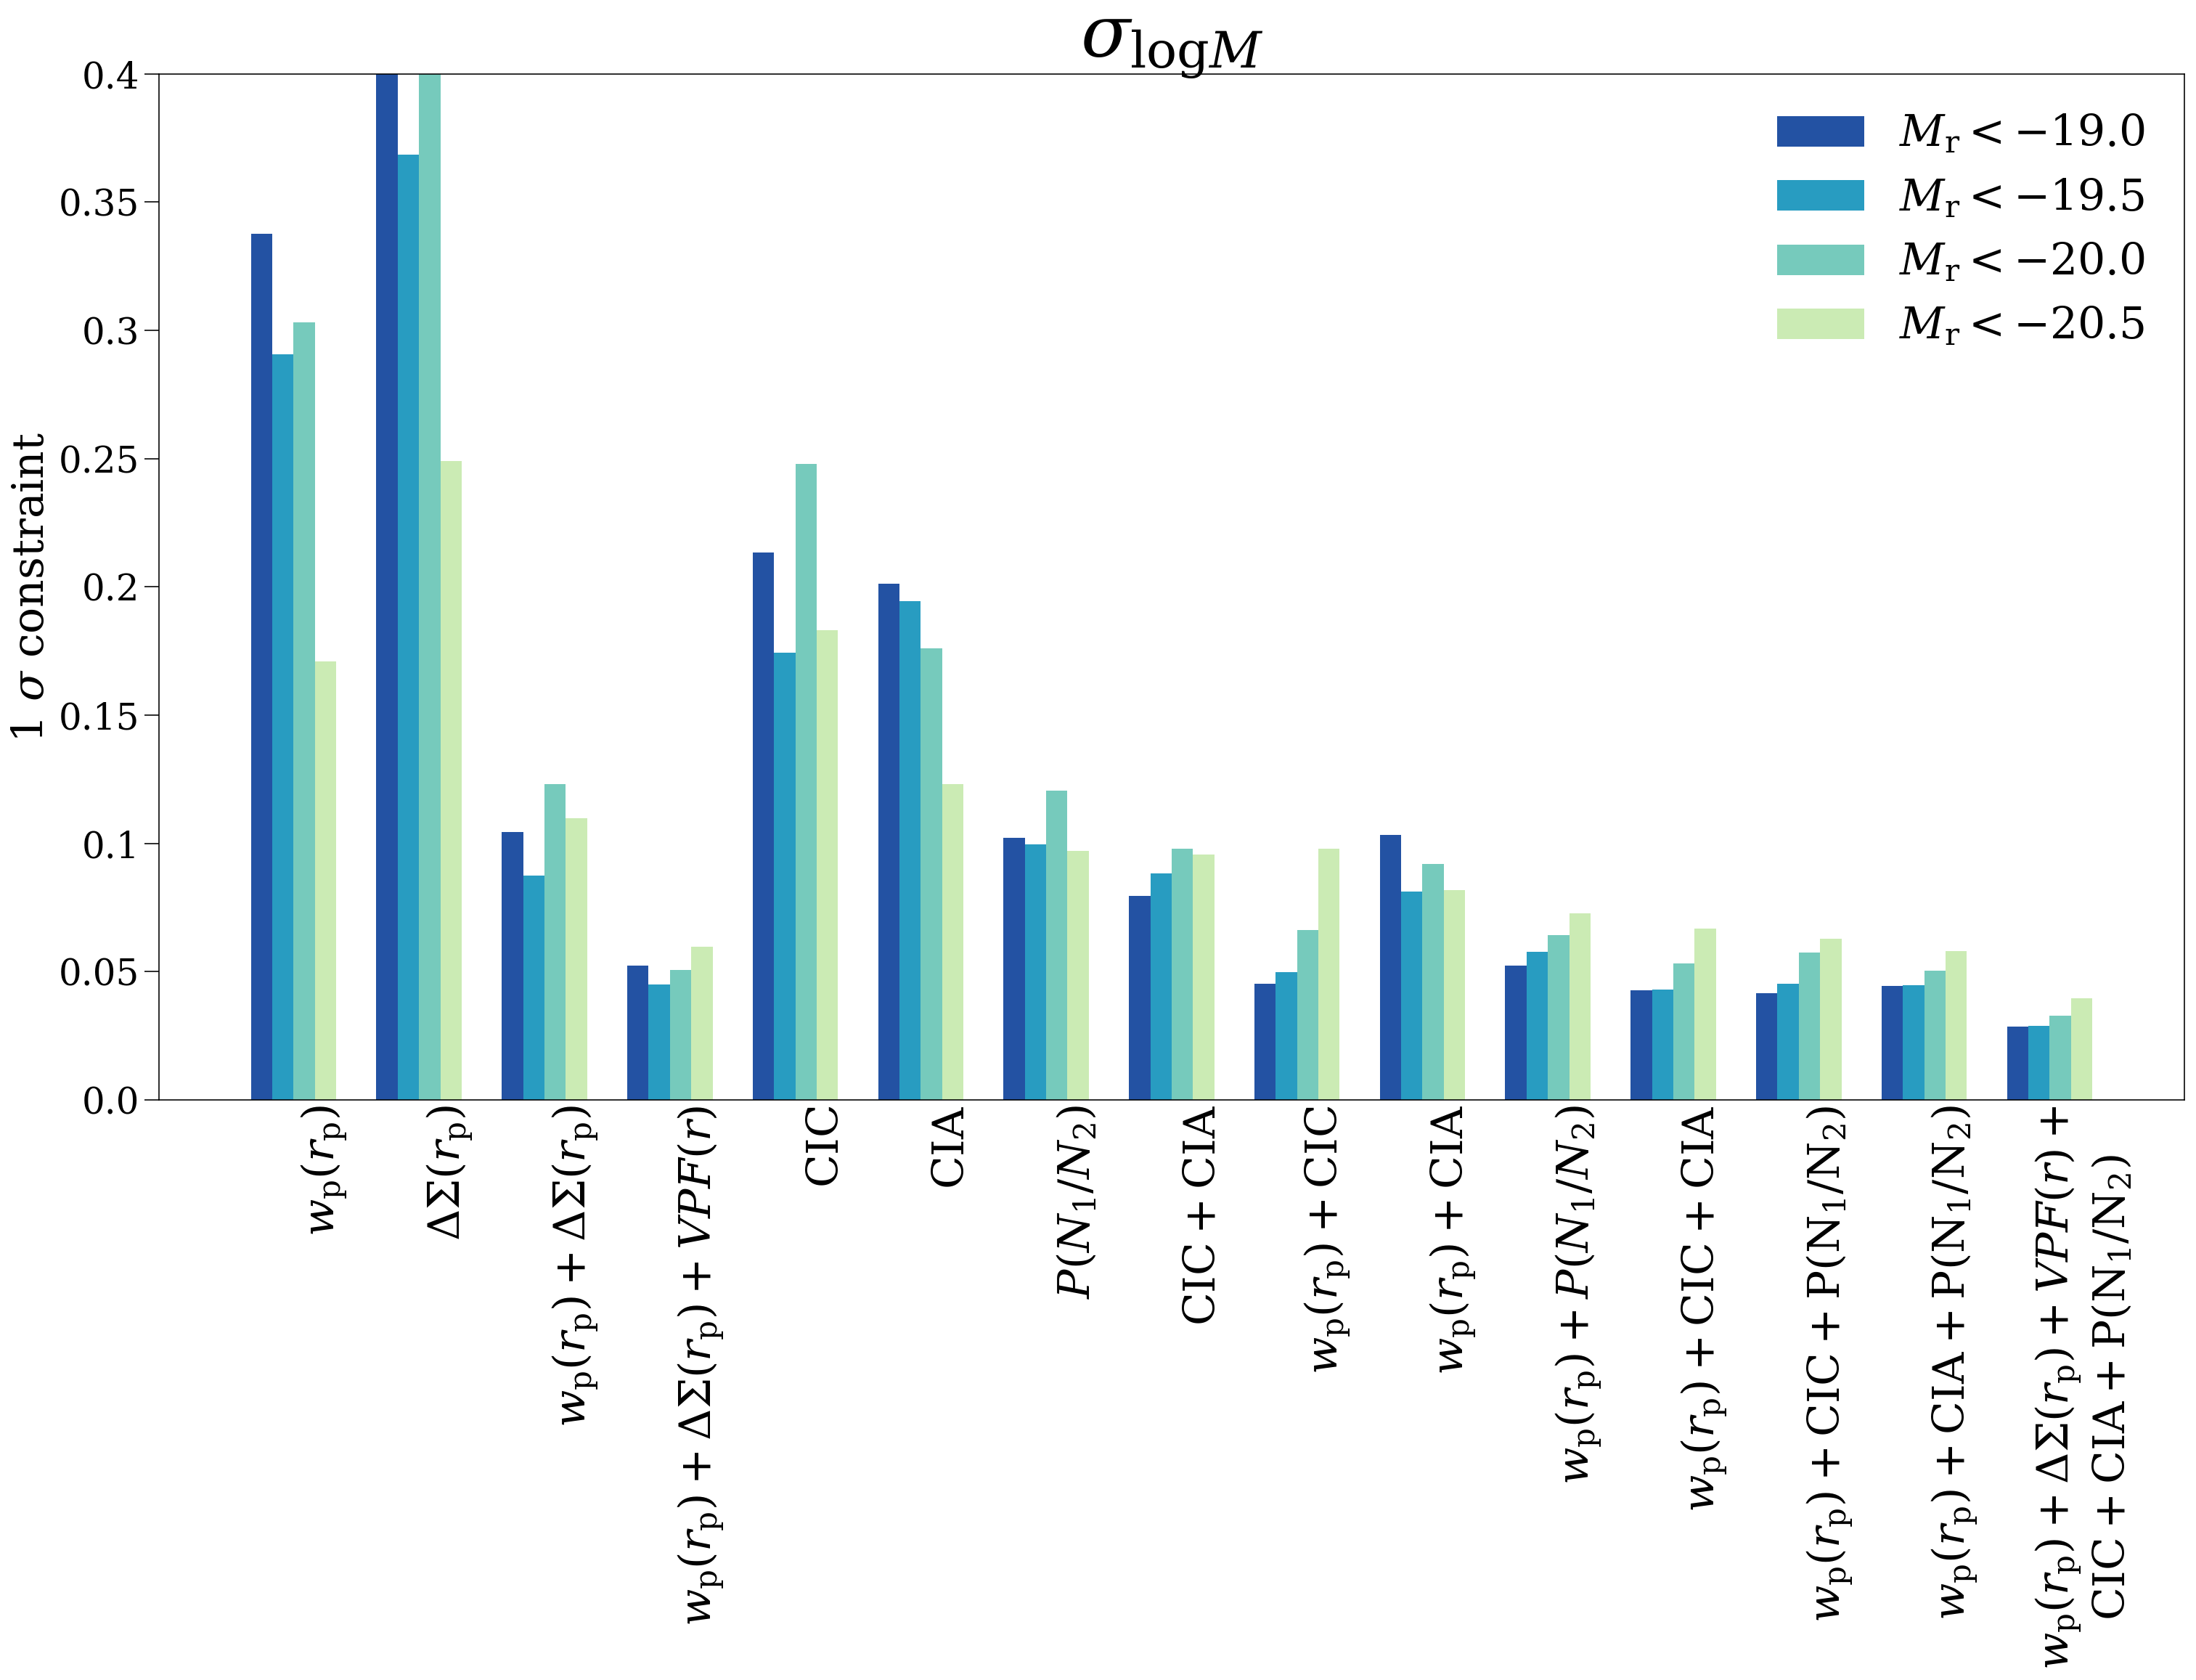

In [48]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,2], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,2], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,2], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,2], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[2],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.4)

plt.show()

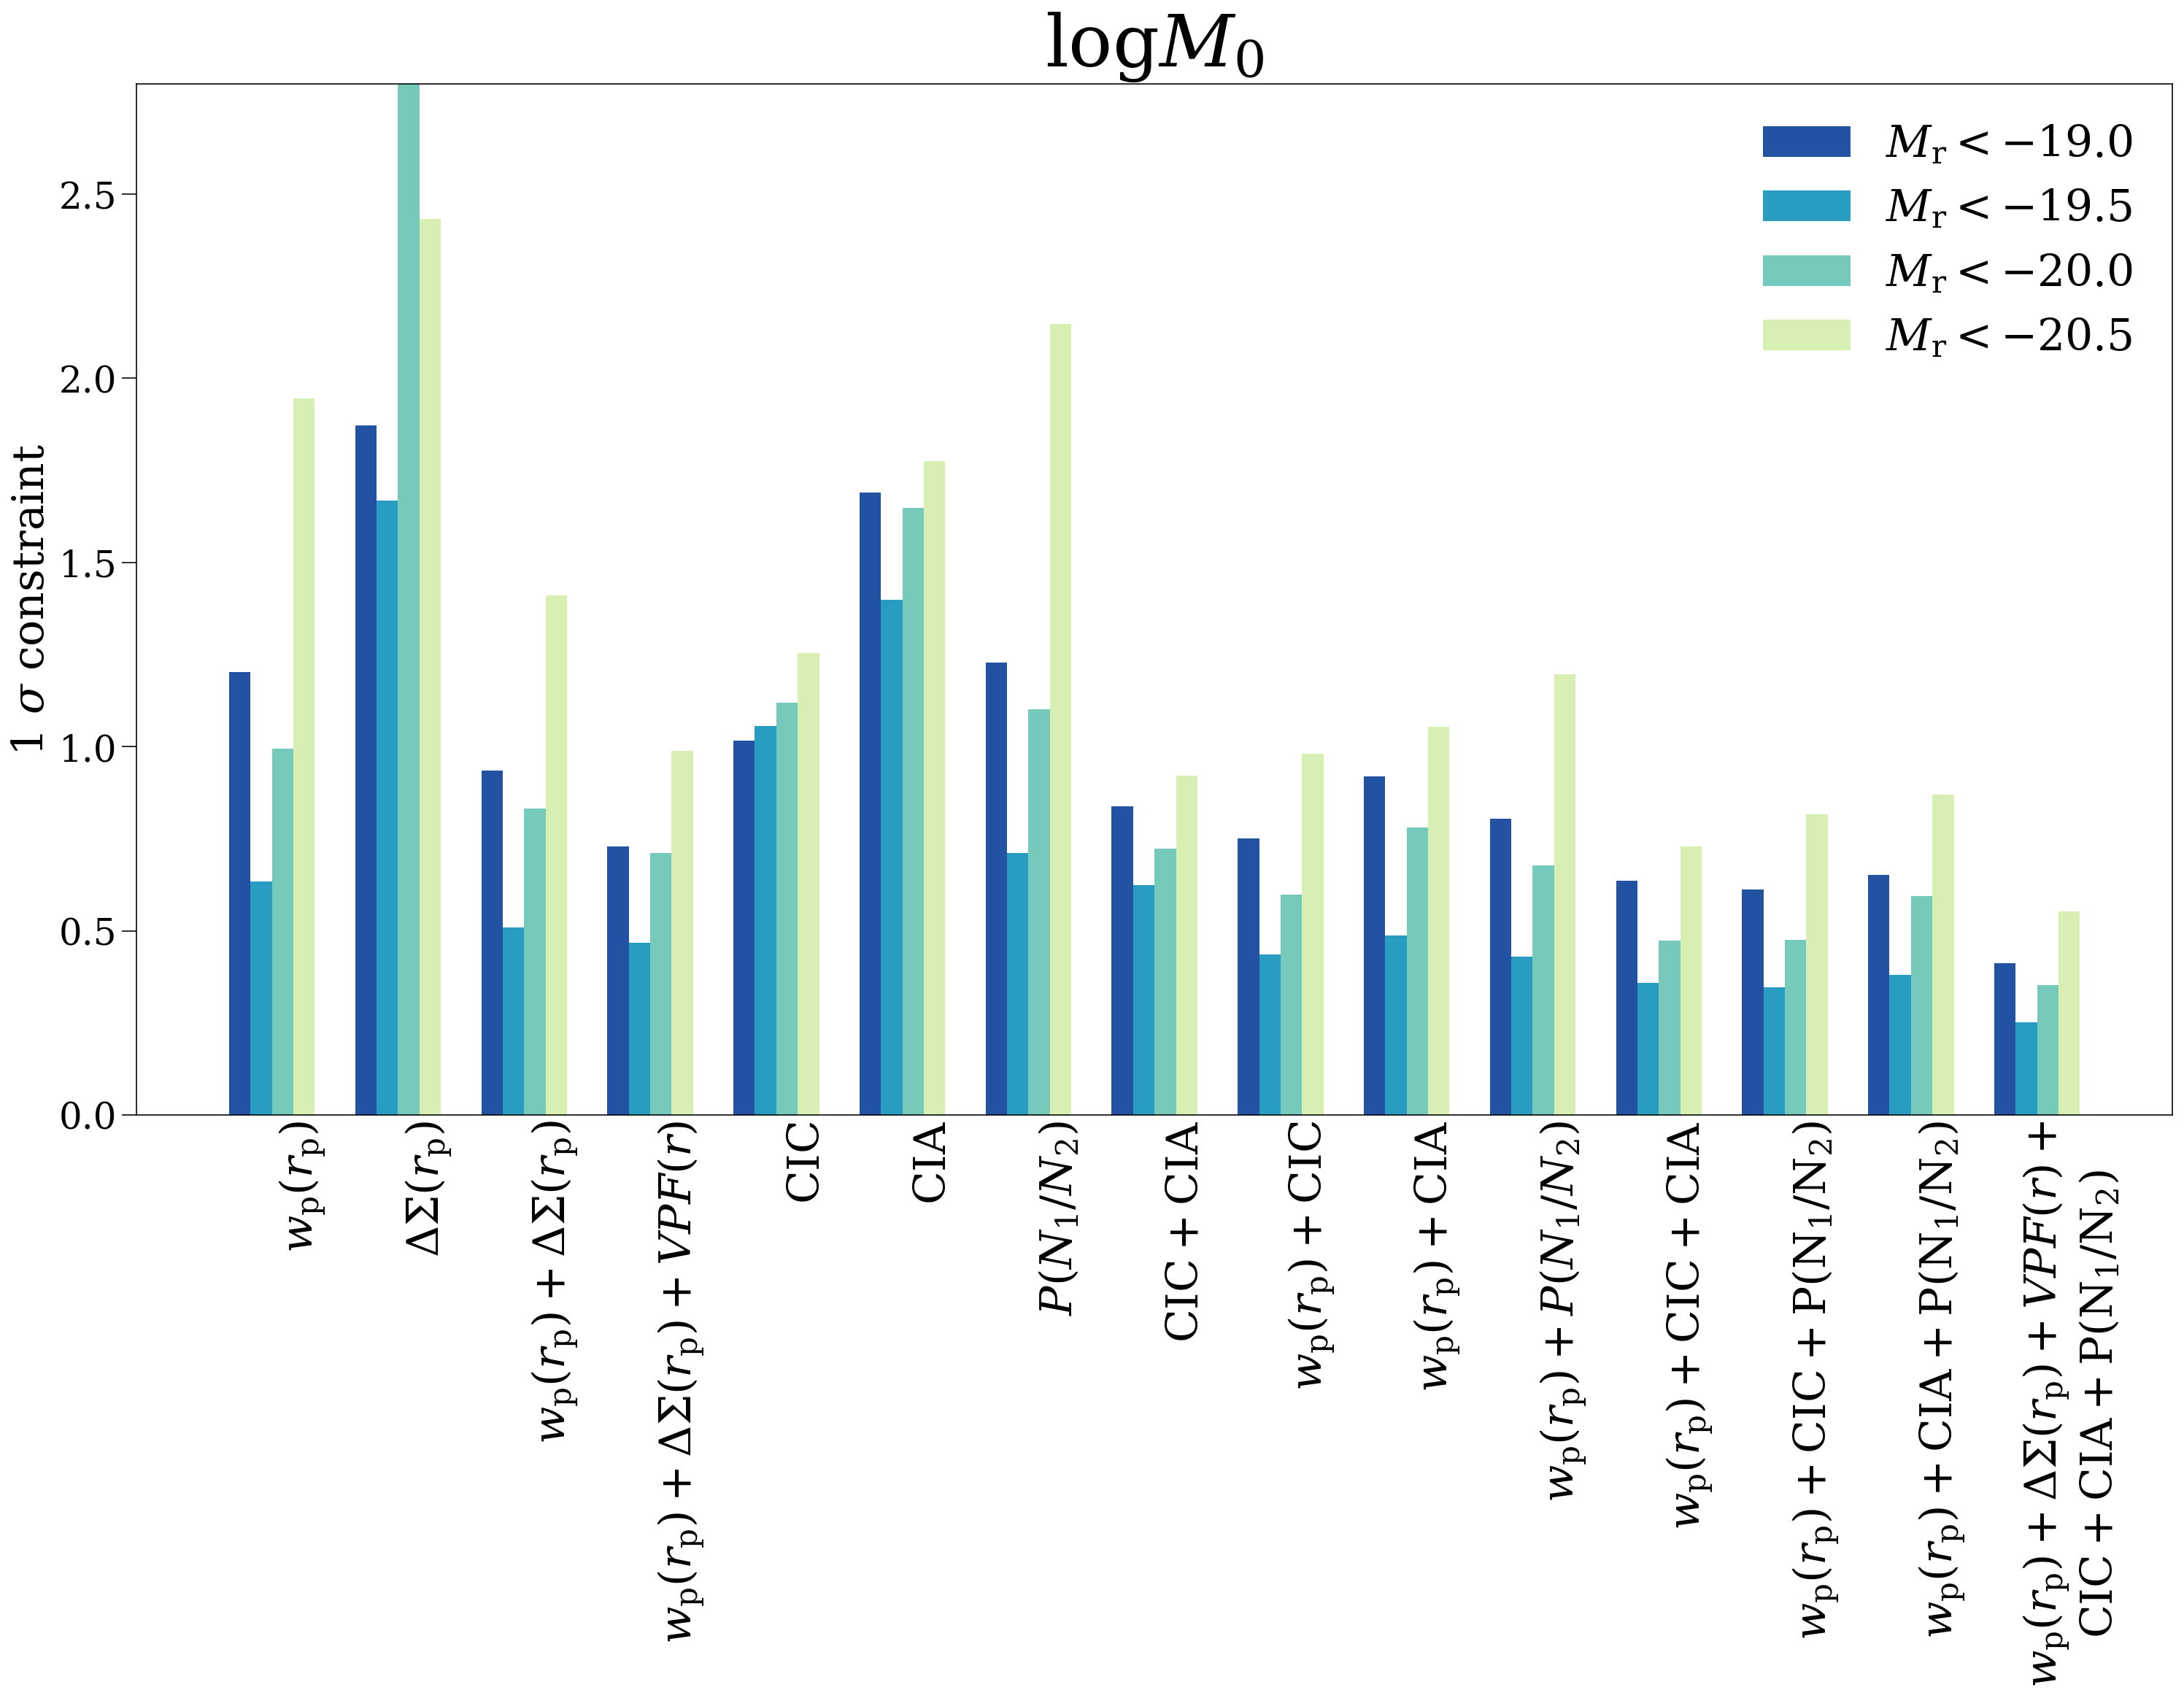

In [50]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,3], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,3], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,3], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,3], width, color=cm.YlGnBu(50))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[3],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.5,1.0,1.5,2.0,2.5],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,2.8)

plt.show()

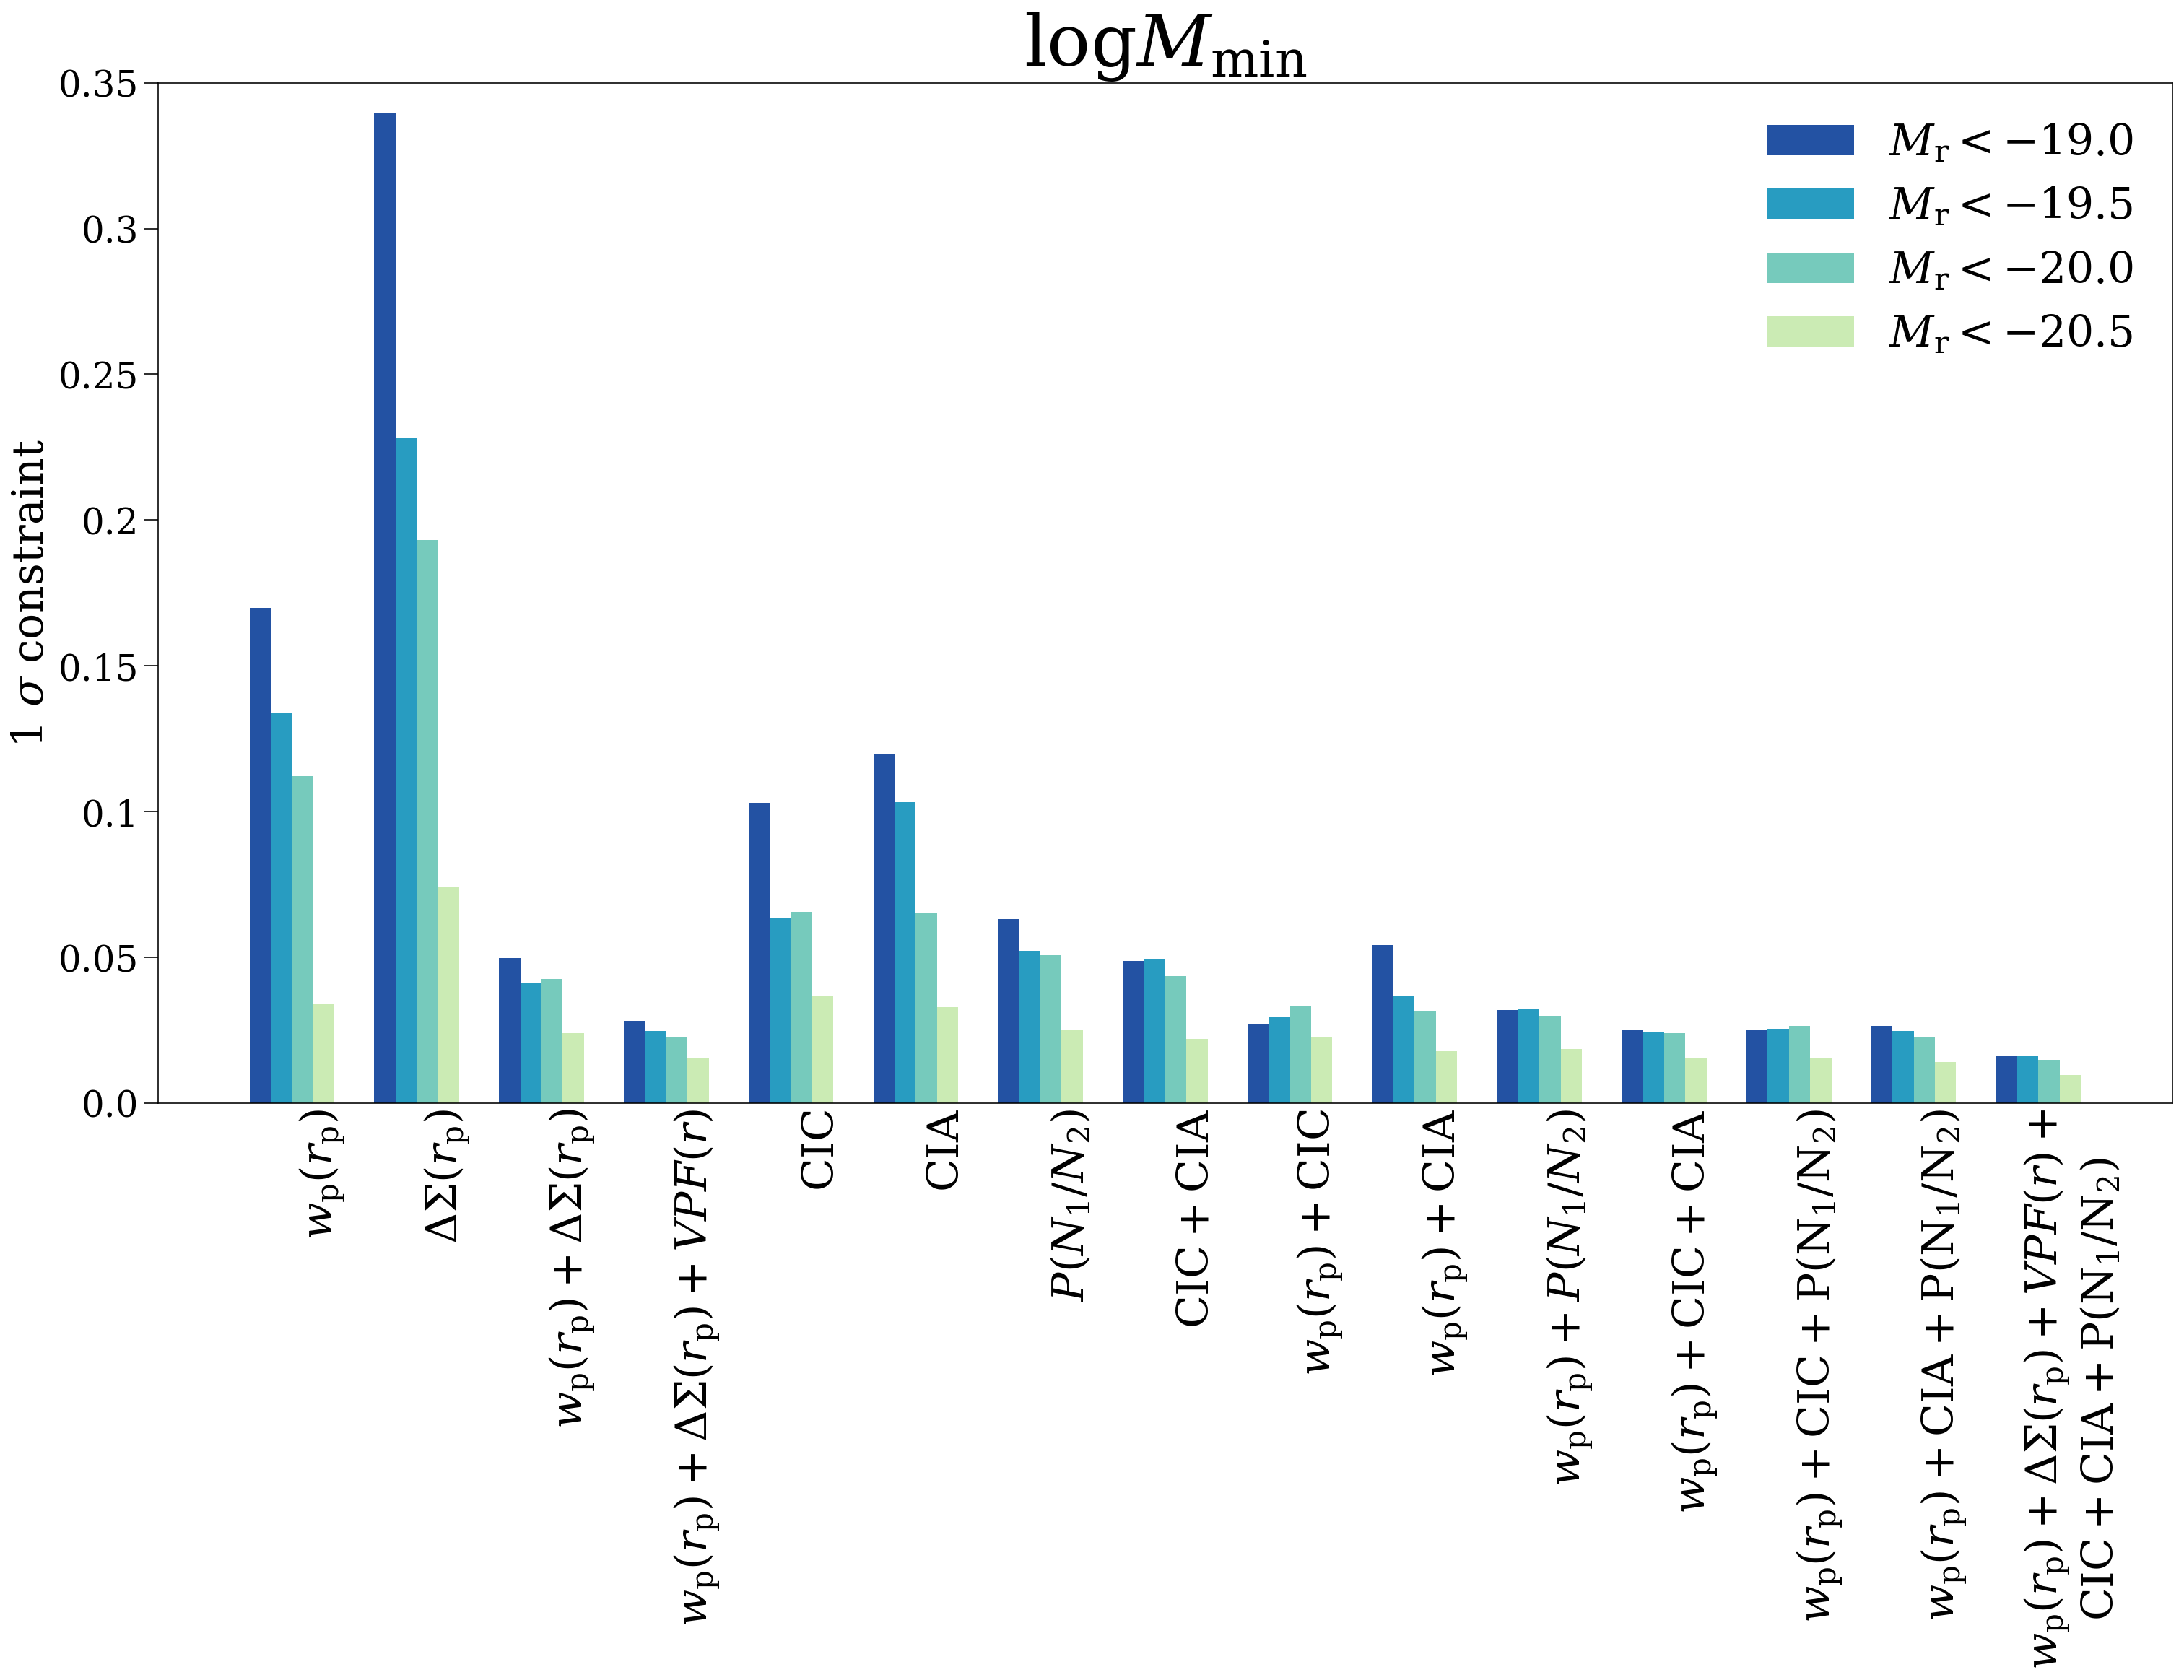

In [53]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.17       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigmalist_19p0[combidx,4], width, color=cm.YlGnBu(200))
rects2 = ax.bar(ind+width, sigmalist_19p5[combidx,4], width, color=cm.YlGnBu(150))
rects3 = ax.bar(ind+width*2, sigmalist_20p0[combidx,4], width, color=cm.YlGnBu(100))
rects4 = ax.bar(ind+width*3, sigmalist_20p5[combidx,4], width, color=cm.YlGnBu(60))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[4],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.05,0.10,0.15,0.20,0.25,0.30,0.35],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.35)

plt.show()

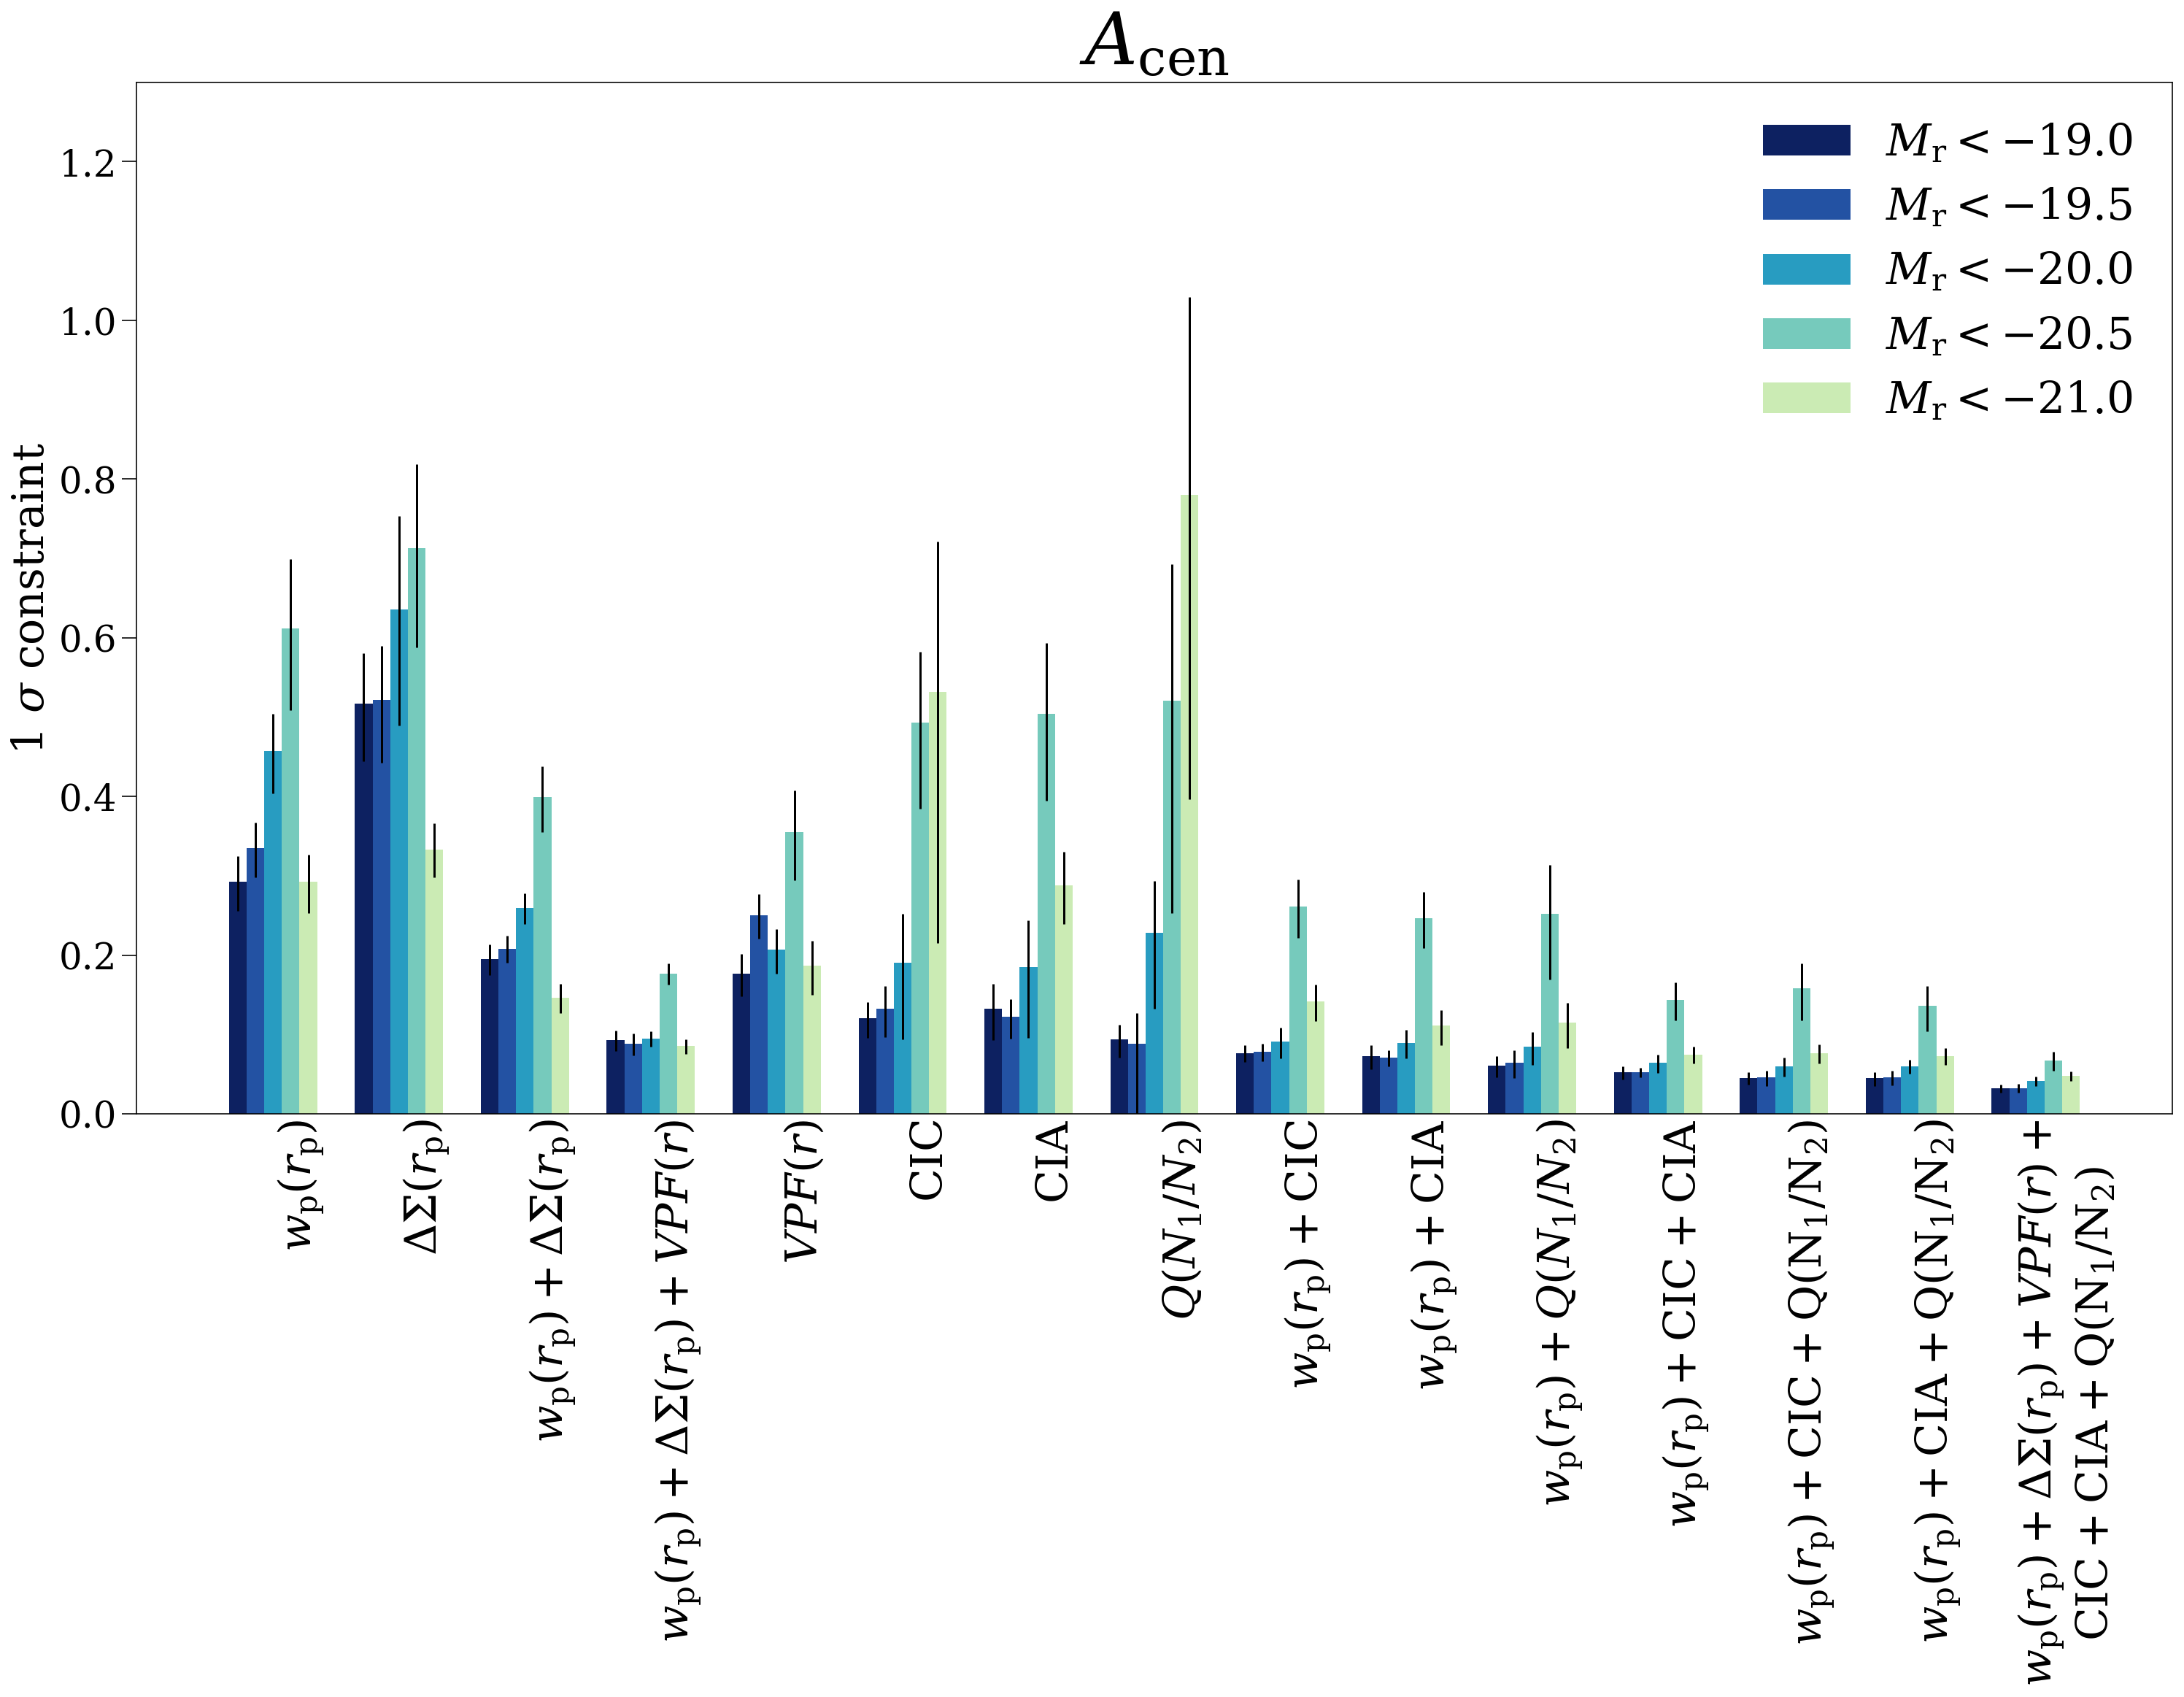

In [42]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,5], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,5],sigma_stdp_19p0[combidx,5]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,5], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,5],sigma_stdp_19p5[combidx,5]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,5], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,5],sigma_stdp_20p0[combidx,5]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,5], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,5],sigma_stdp_20p5[combidx,5]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,5], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,5],sigma_stdp_21p0[combidx,5]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{cen}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

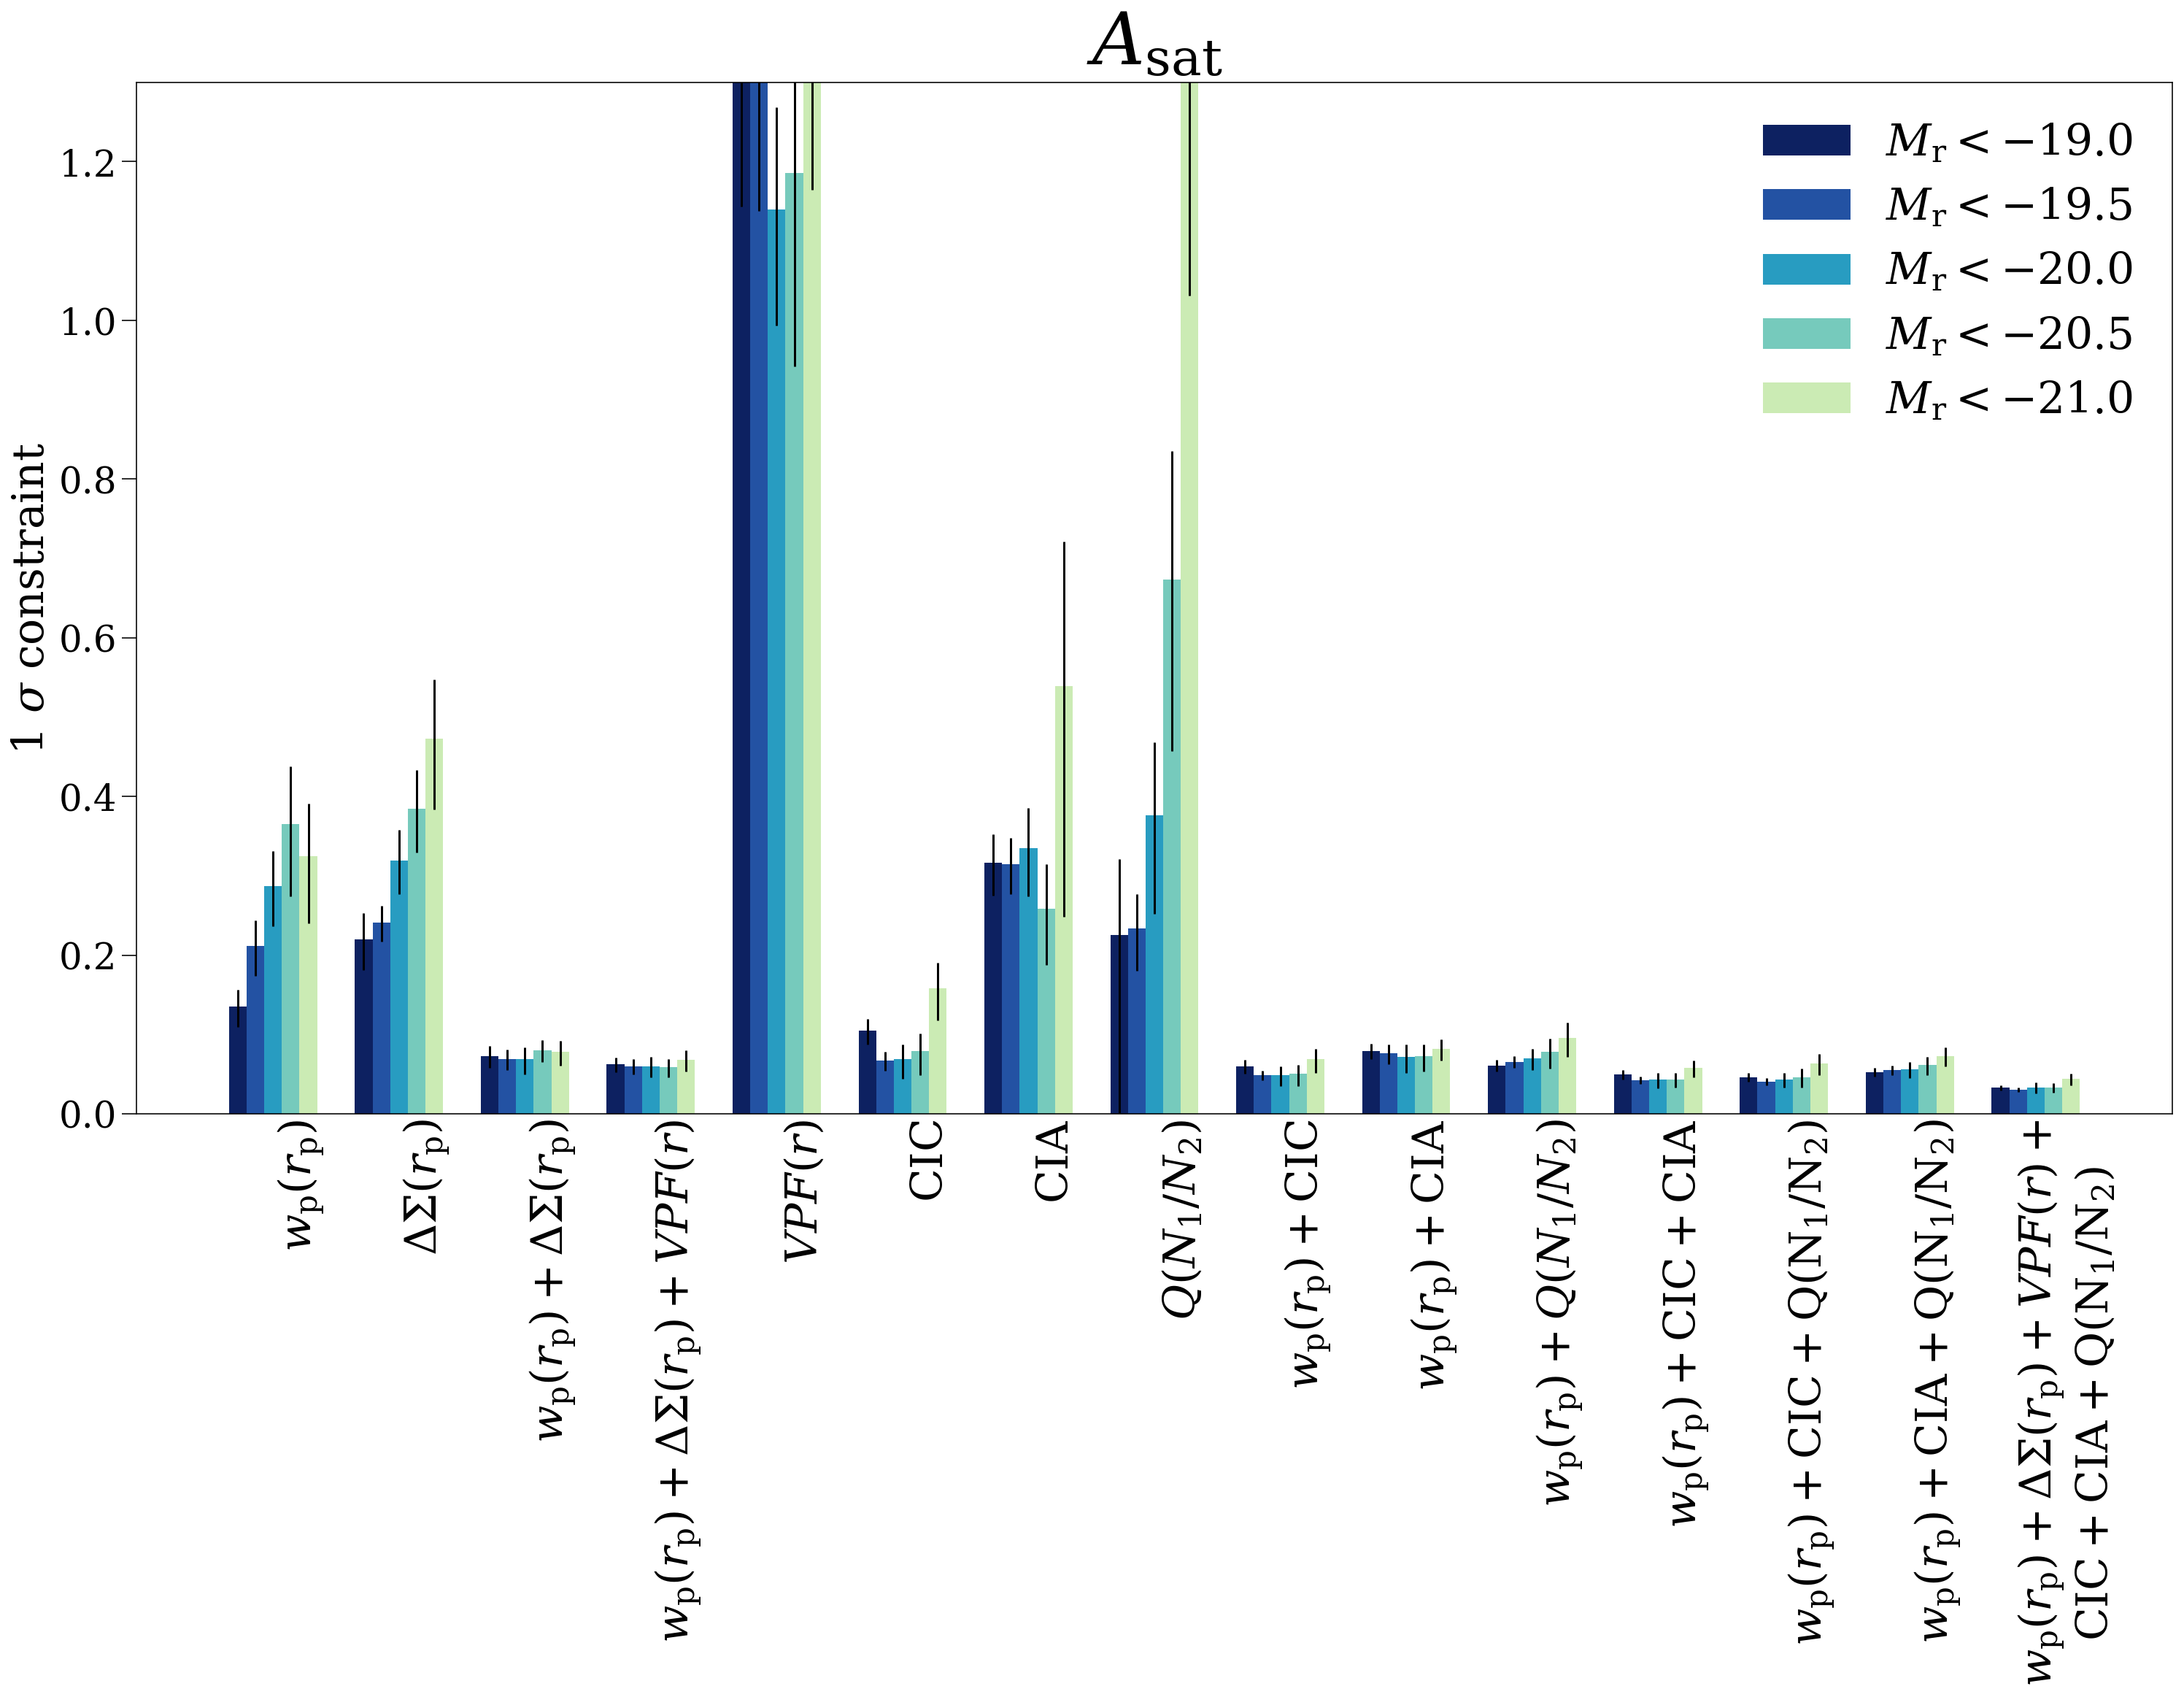

In [43]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,6], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,6],sigma_stdp_19p0[combidx,6]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,6], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,6],sigma_stdp_19p5[combidx,6]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,6], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,6],sigma_stdp_20p0[combidx,6]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,6], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,6],sigma_stdp_20p5[combidx,6]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,6], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,6],sigma_stdp_21p0[combidx,6]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{sat}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

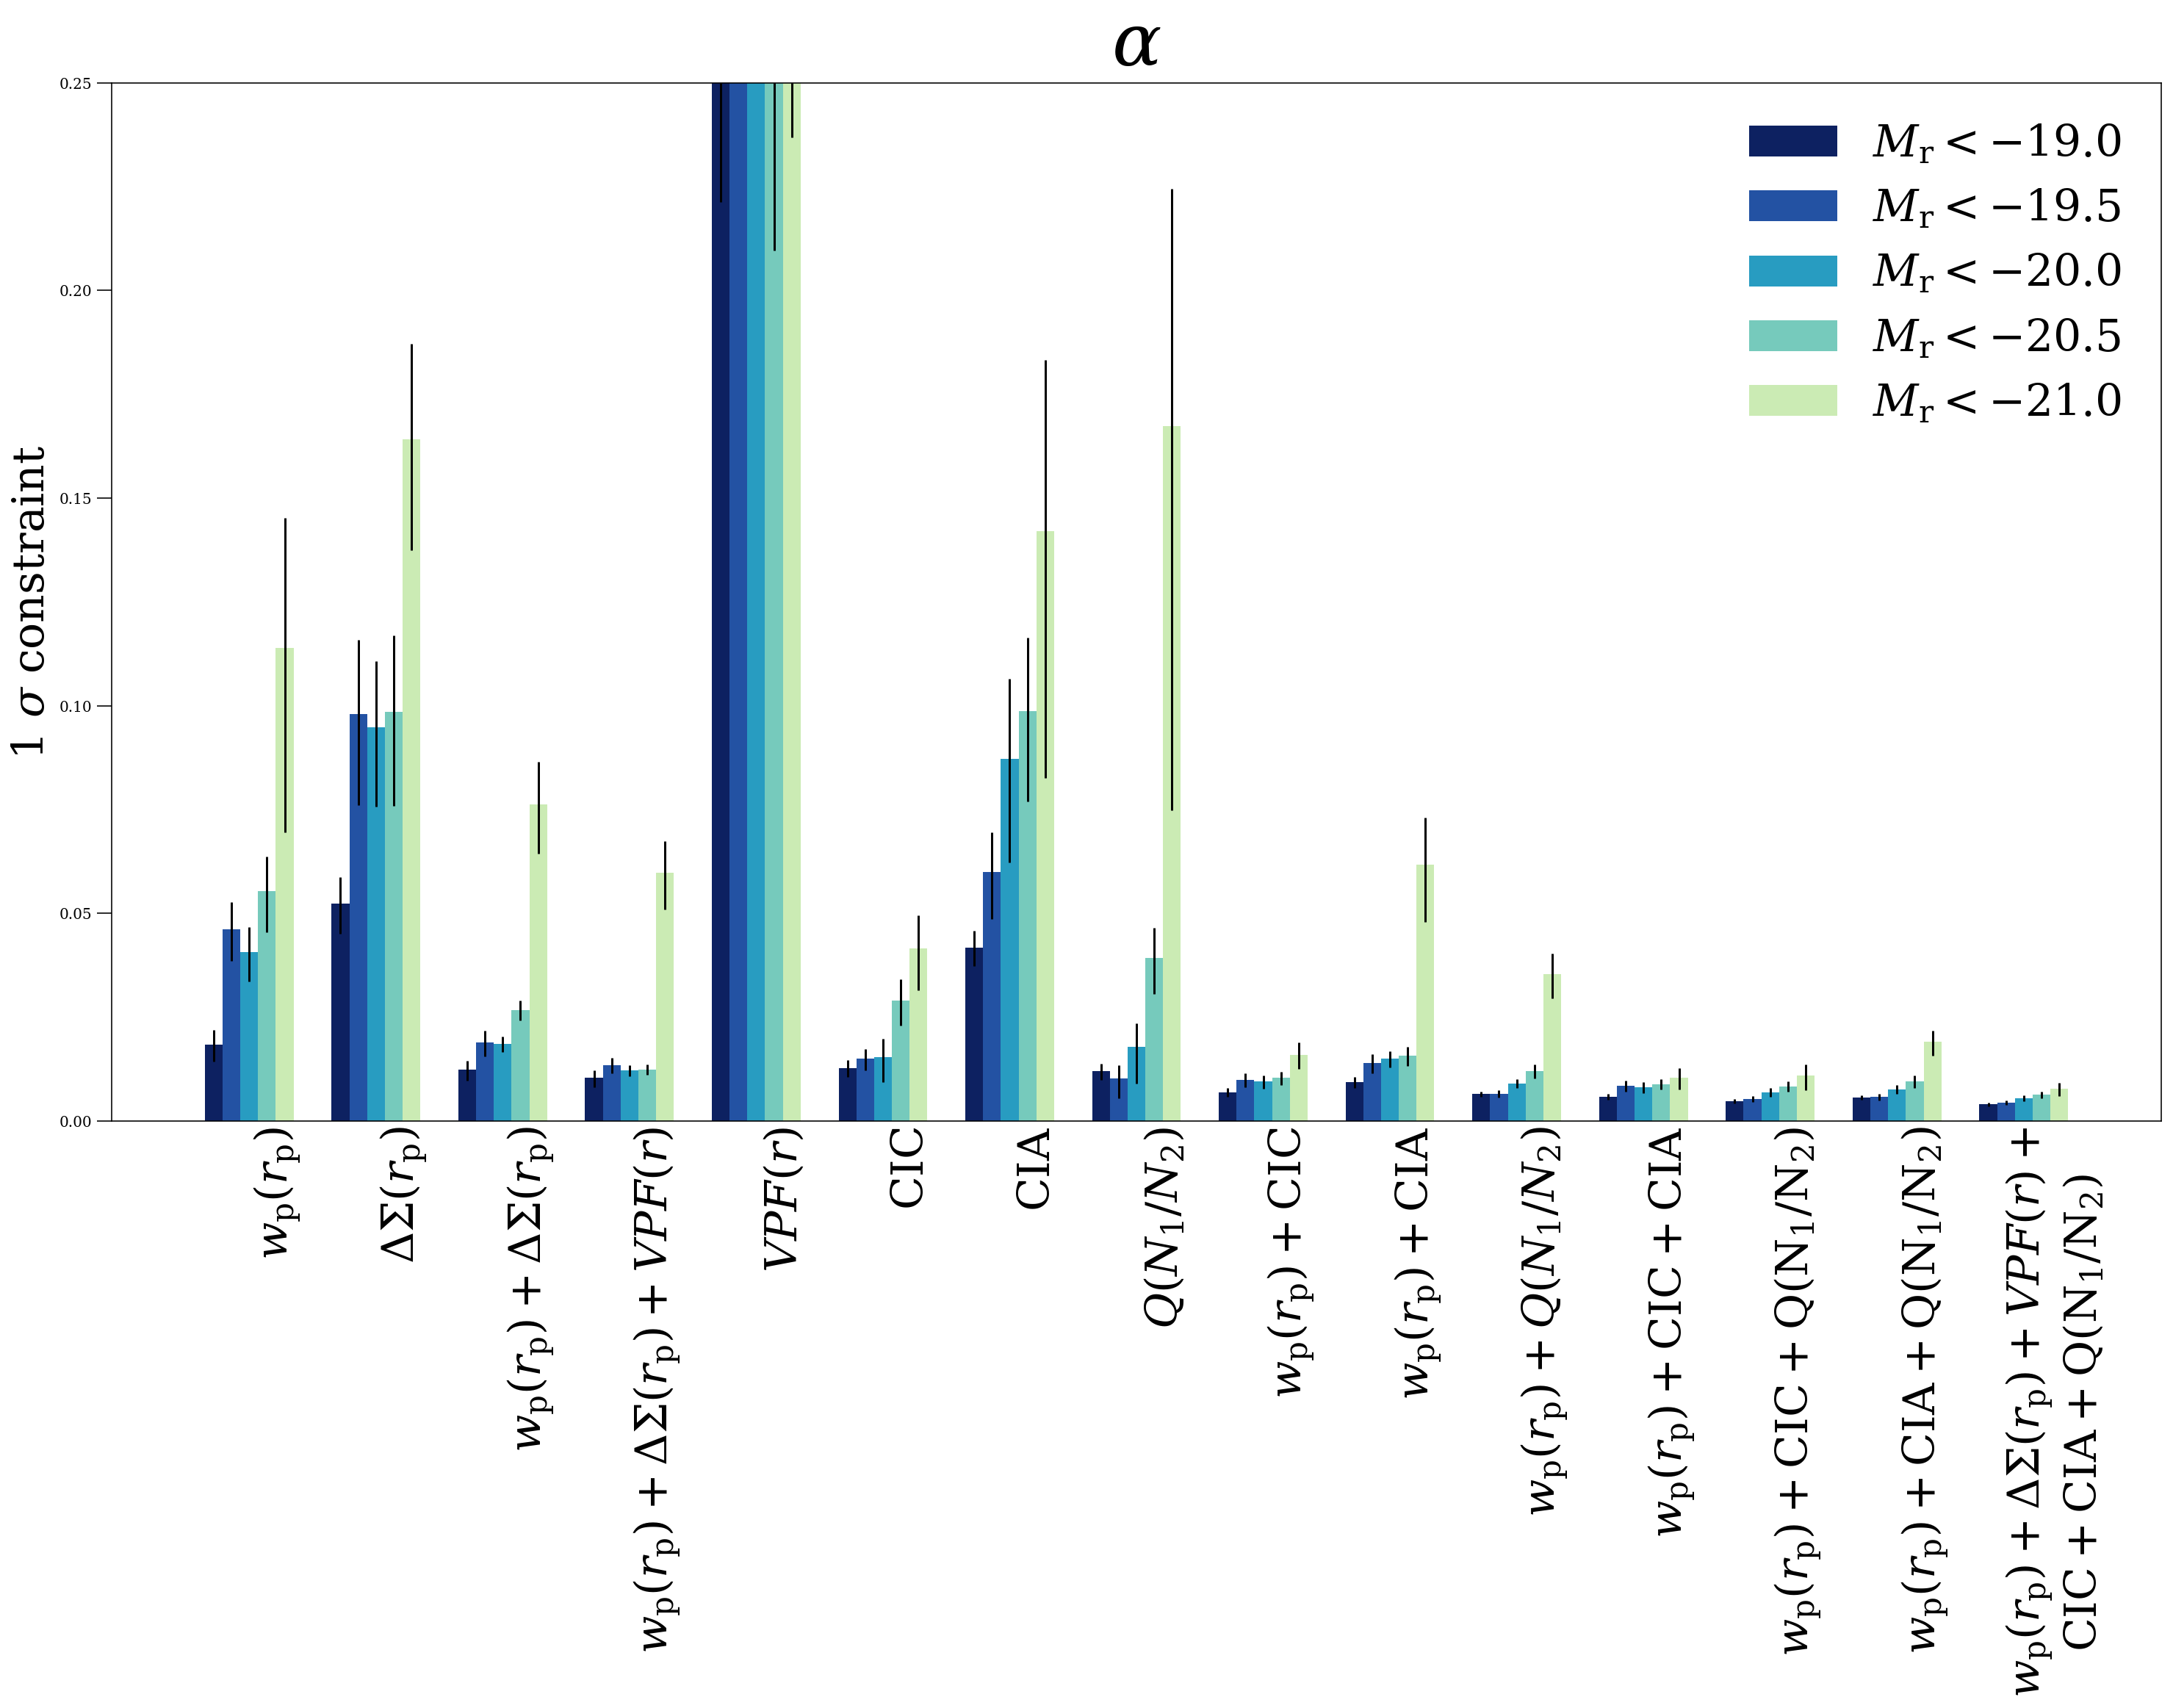

In [44]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,0], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,0],sigma_stdp_19p0[combidx,0]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,0], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,0],sigma_stdp_19p5[combidx,0]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,0], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,0],sigma_stdp_20p0[combidx,0]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,0], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,0],sigma_stdp_20p5[combidx,0]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,0], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,0],sigma_stdp_21p0[combidx,0]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$\alpha$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.25)

plt.show()

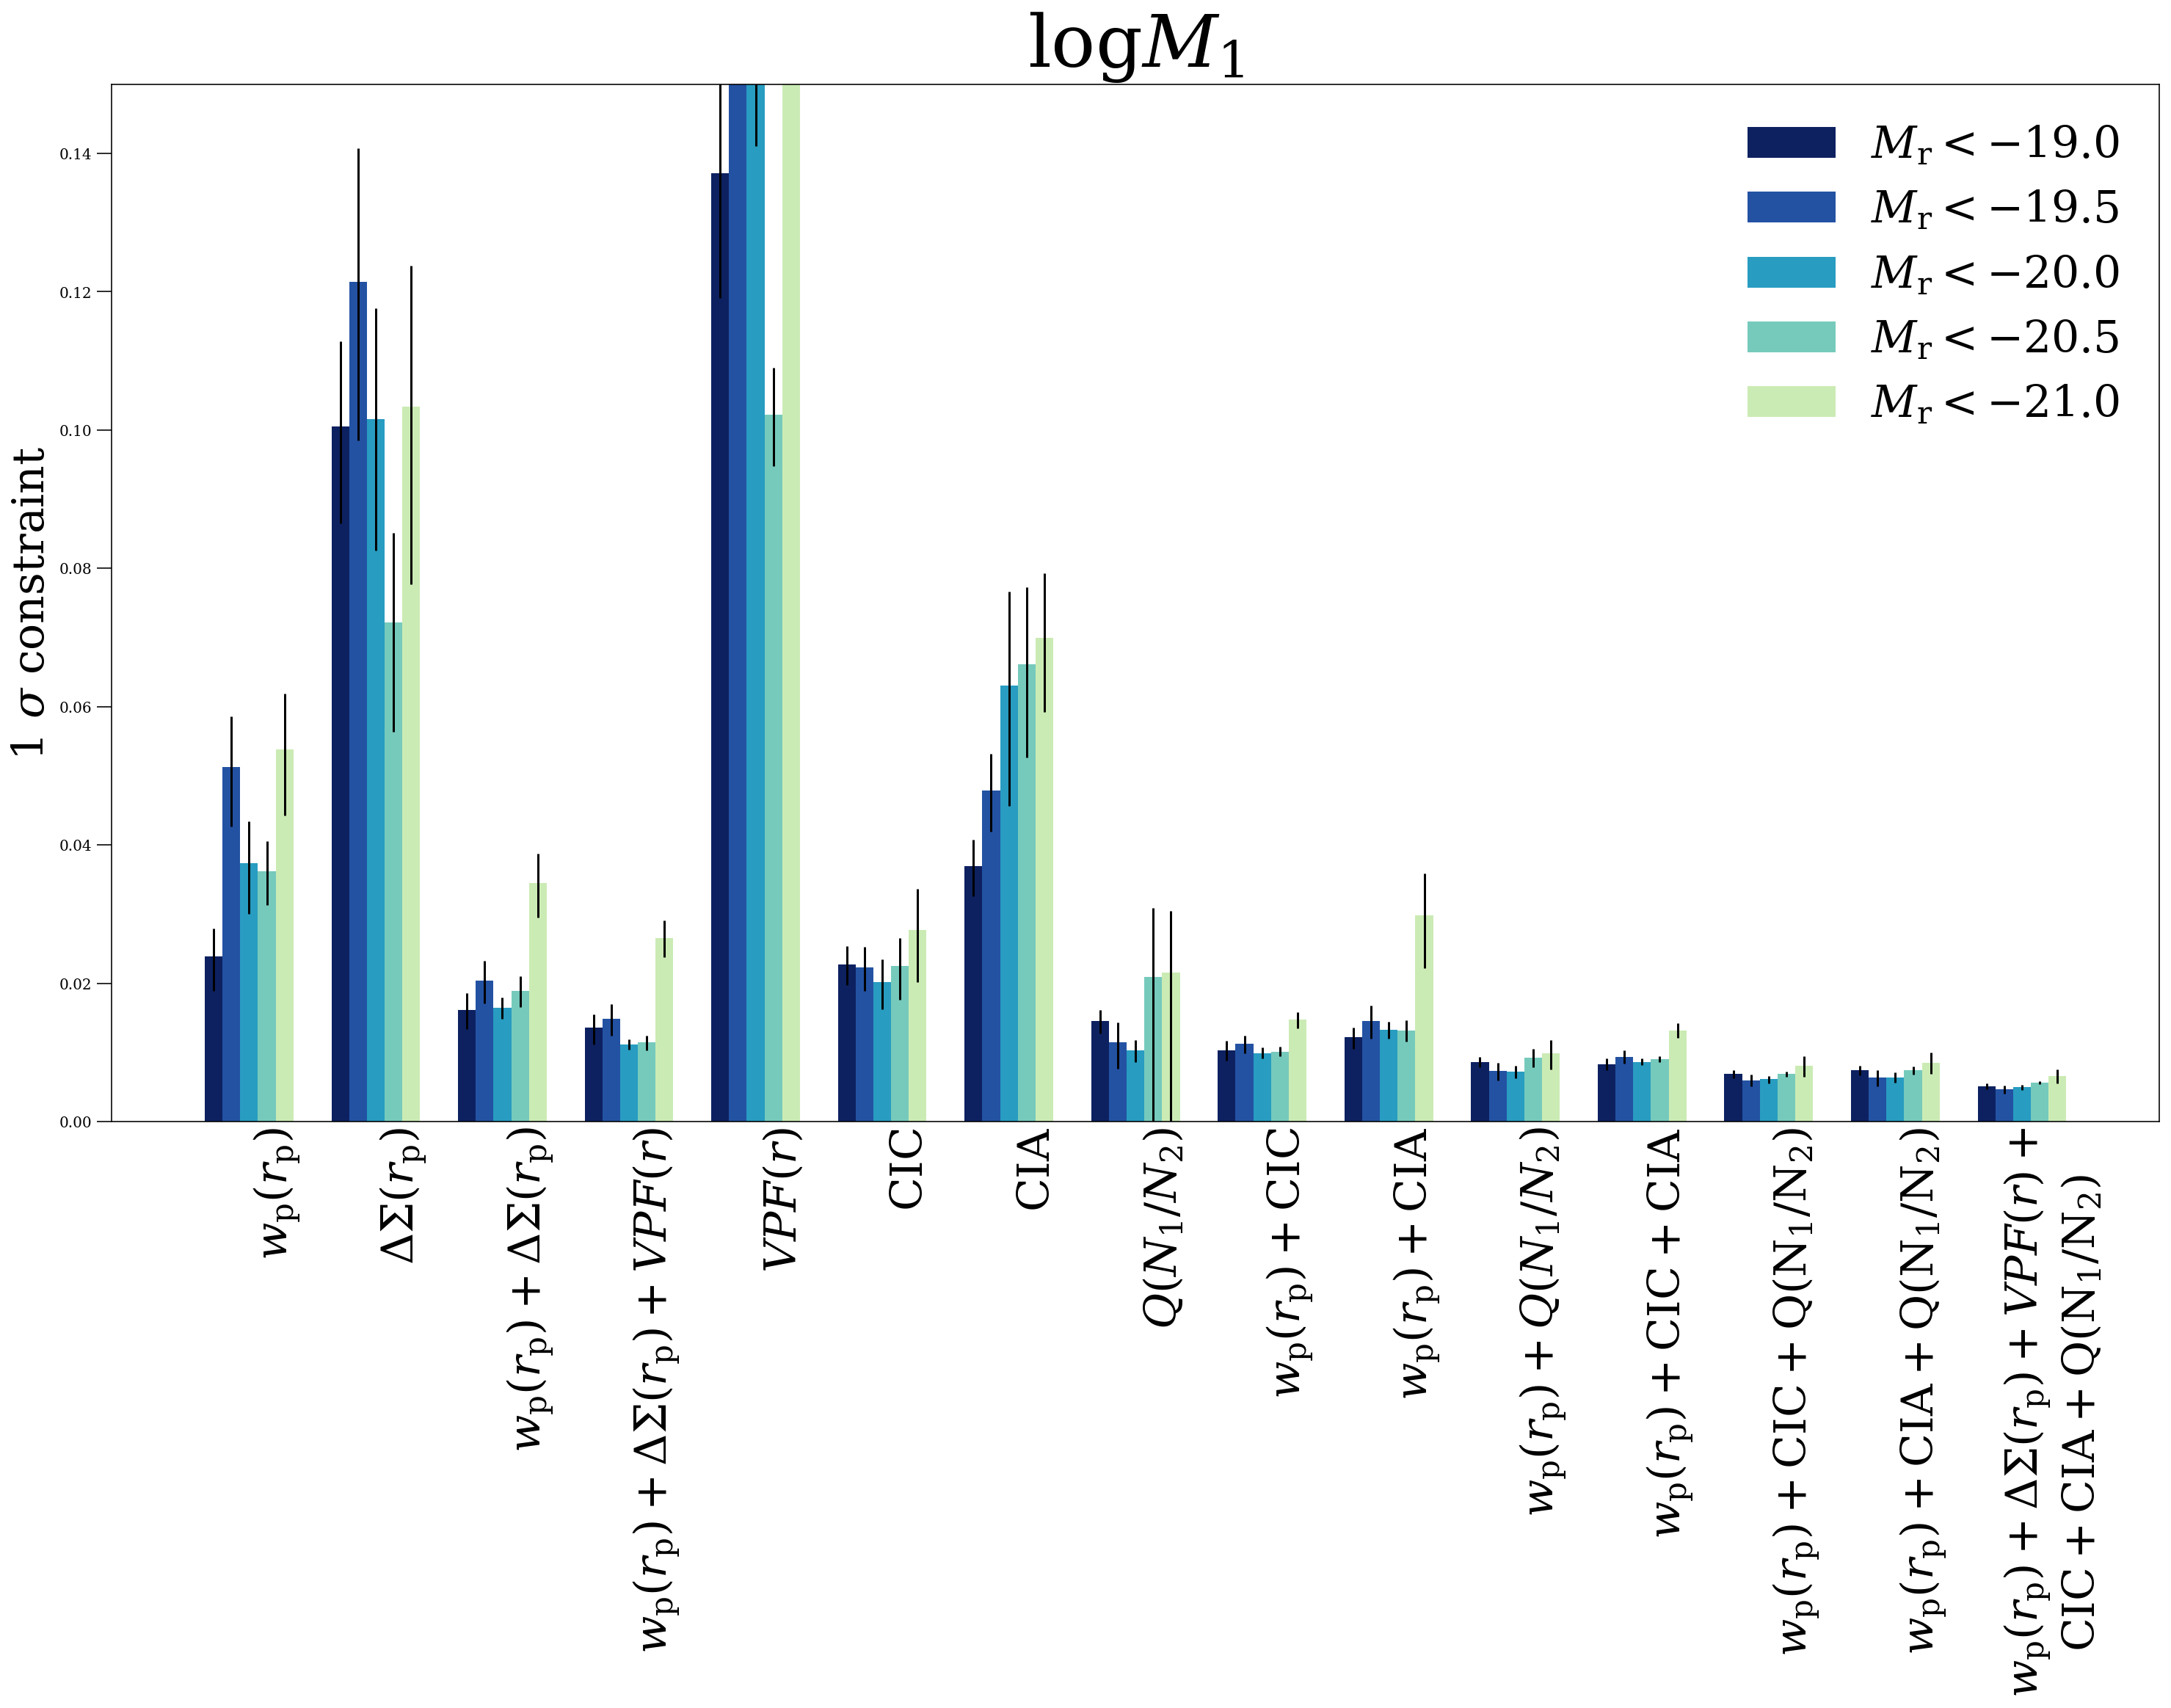

In [45]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,1], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,1],sigma_stdp_19p0[combidx,1]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,1], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,1],sigma_stdp_19p5[combidx,1]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,1], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,1],sigma_stdp_20p0[combidx,1]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,1], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,1],sigma_stdp_20p5[combidx,1]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,1], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,1],sigma_stdp_21p0[combidx,1]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[1],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.15)

plt.show()

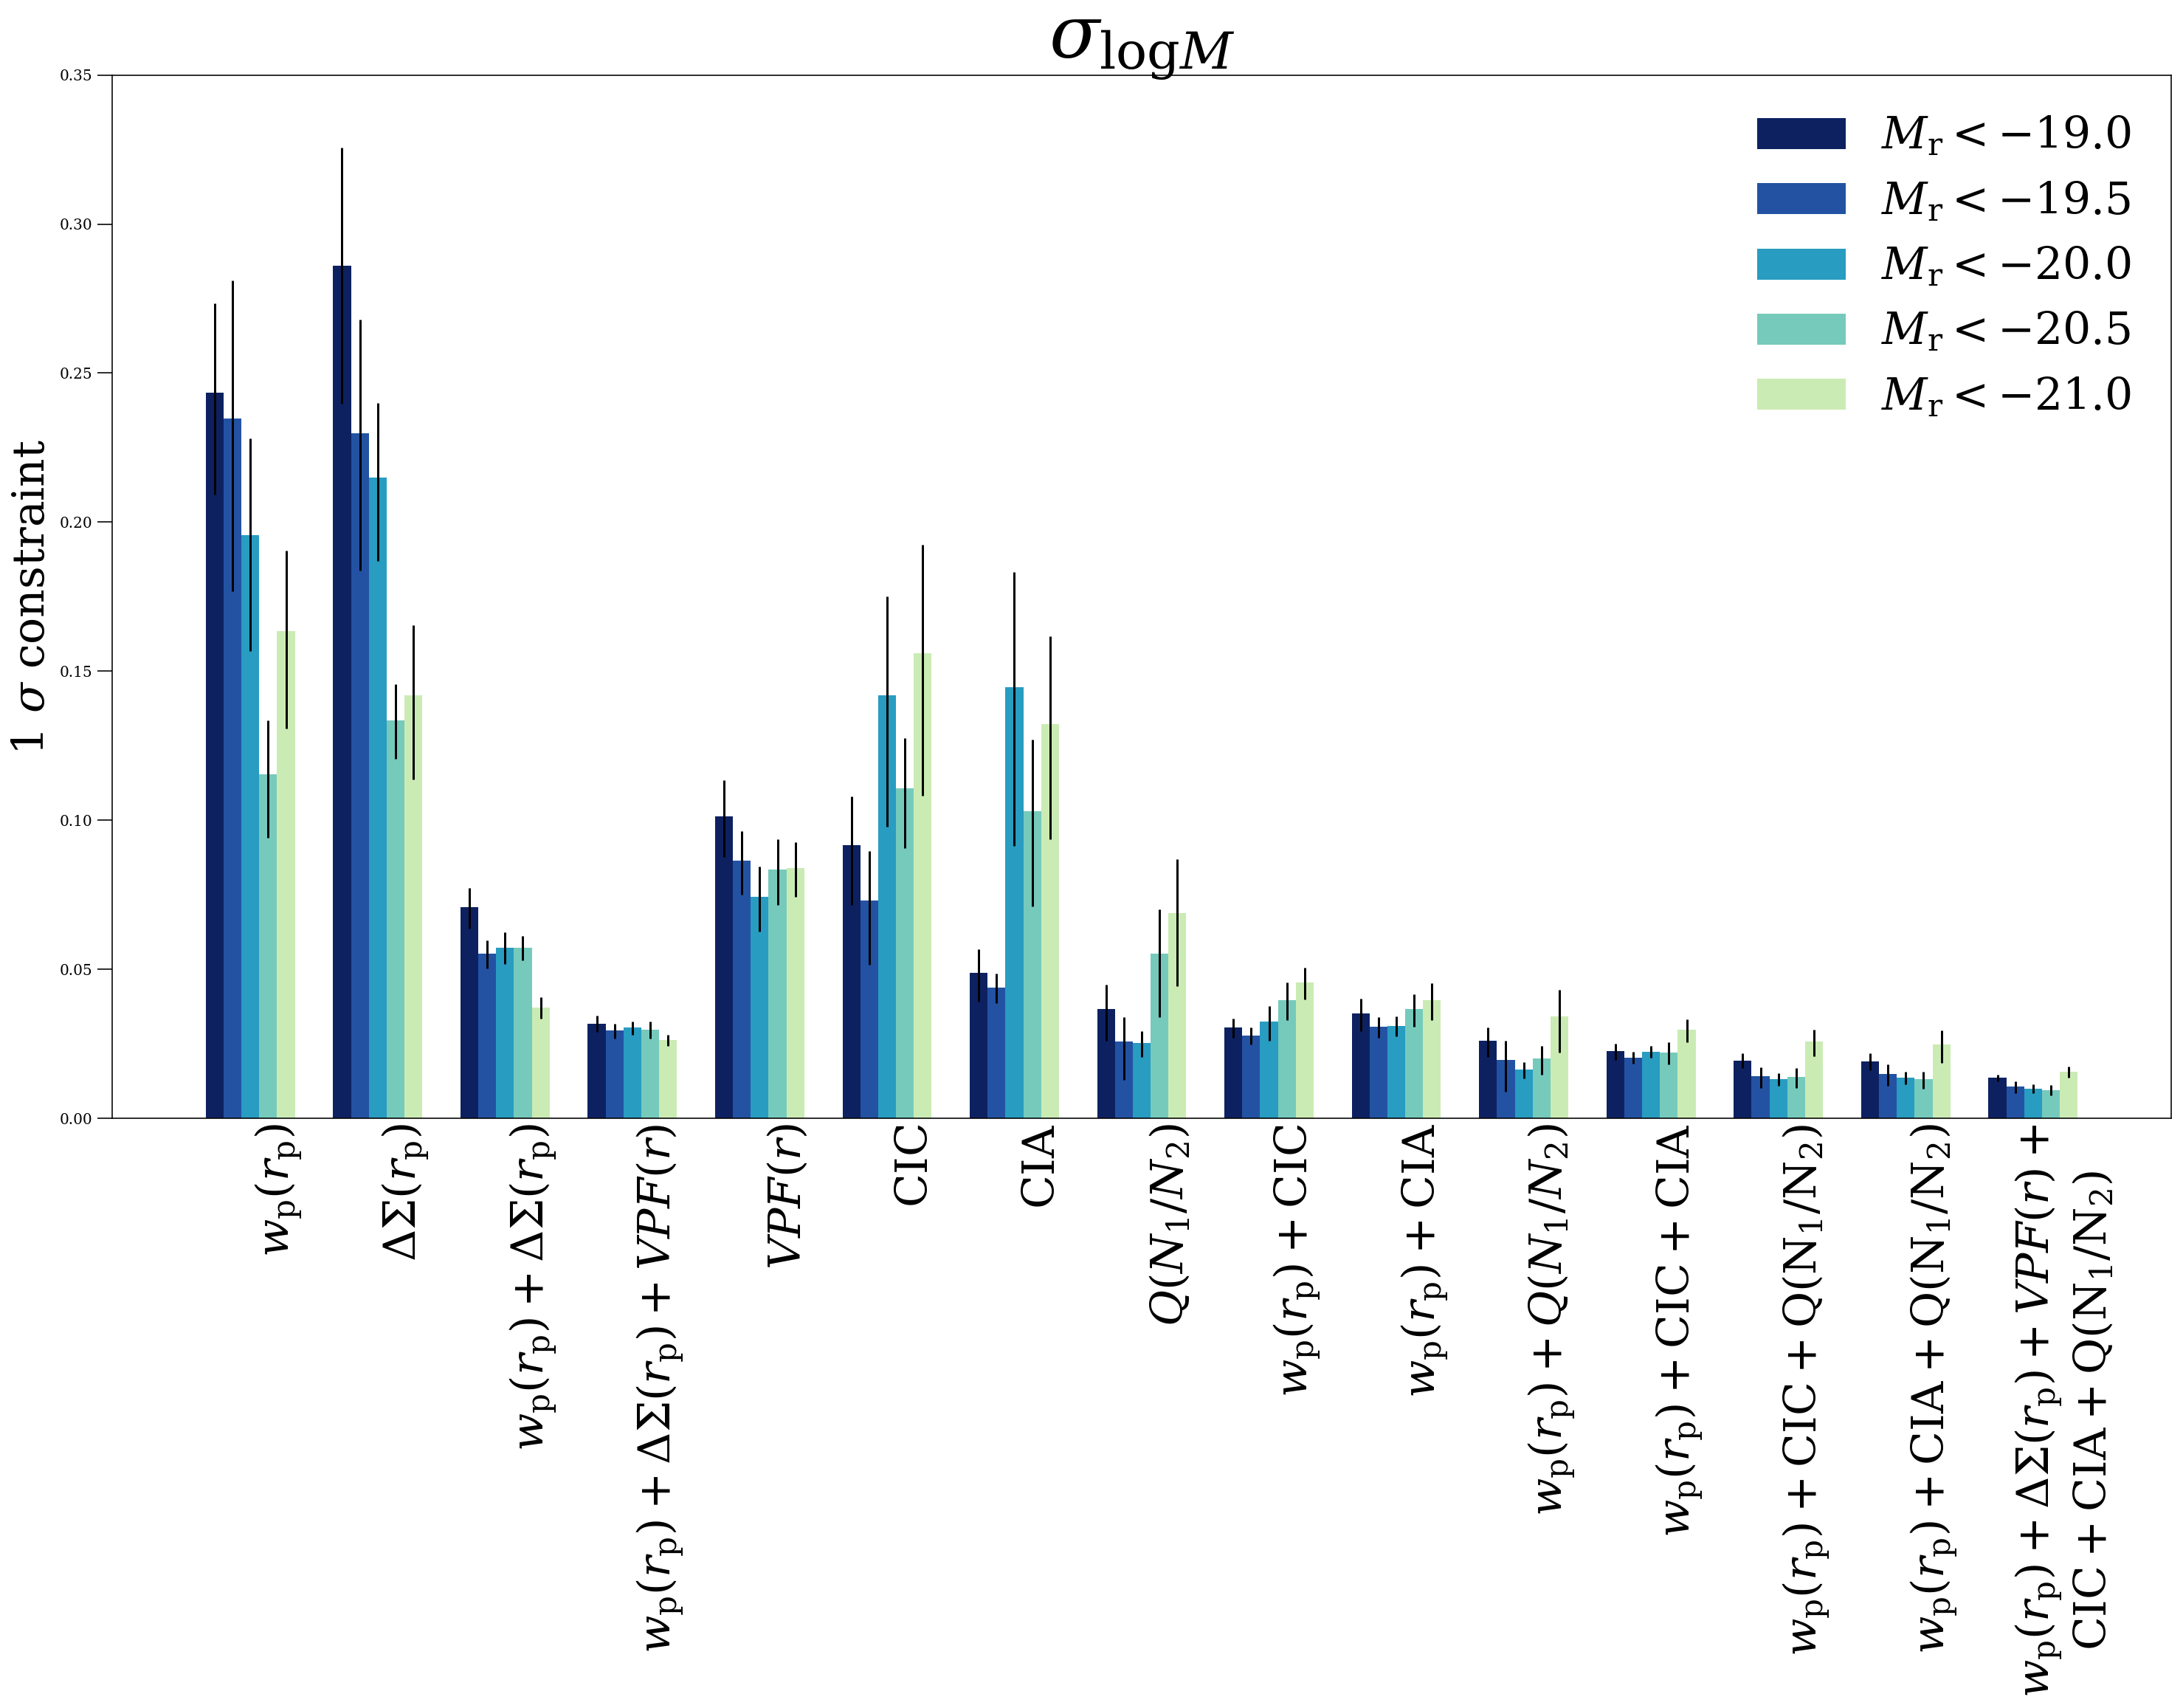

In [46]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,2], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,2],sigma_stdp_19p0[combidx,2]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,2], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,2],sigma_stdp_19p5[combidx,2]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,2], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,2],sigma_stdp_20p0[combidx,2]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,2], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,2],sigma_stdp_20p5[combidx,2]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,2], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,2],sigma_stdp_21p0[combidx,2]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[2],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.35)

plt.show()

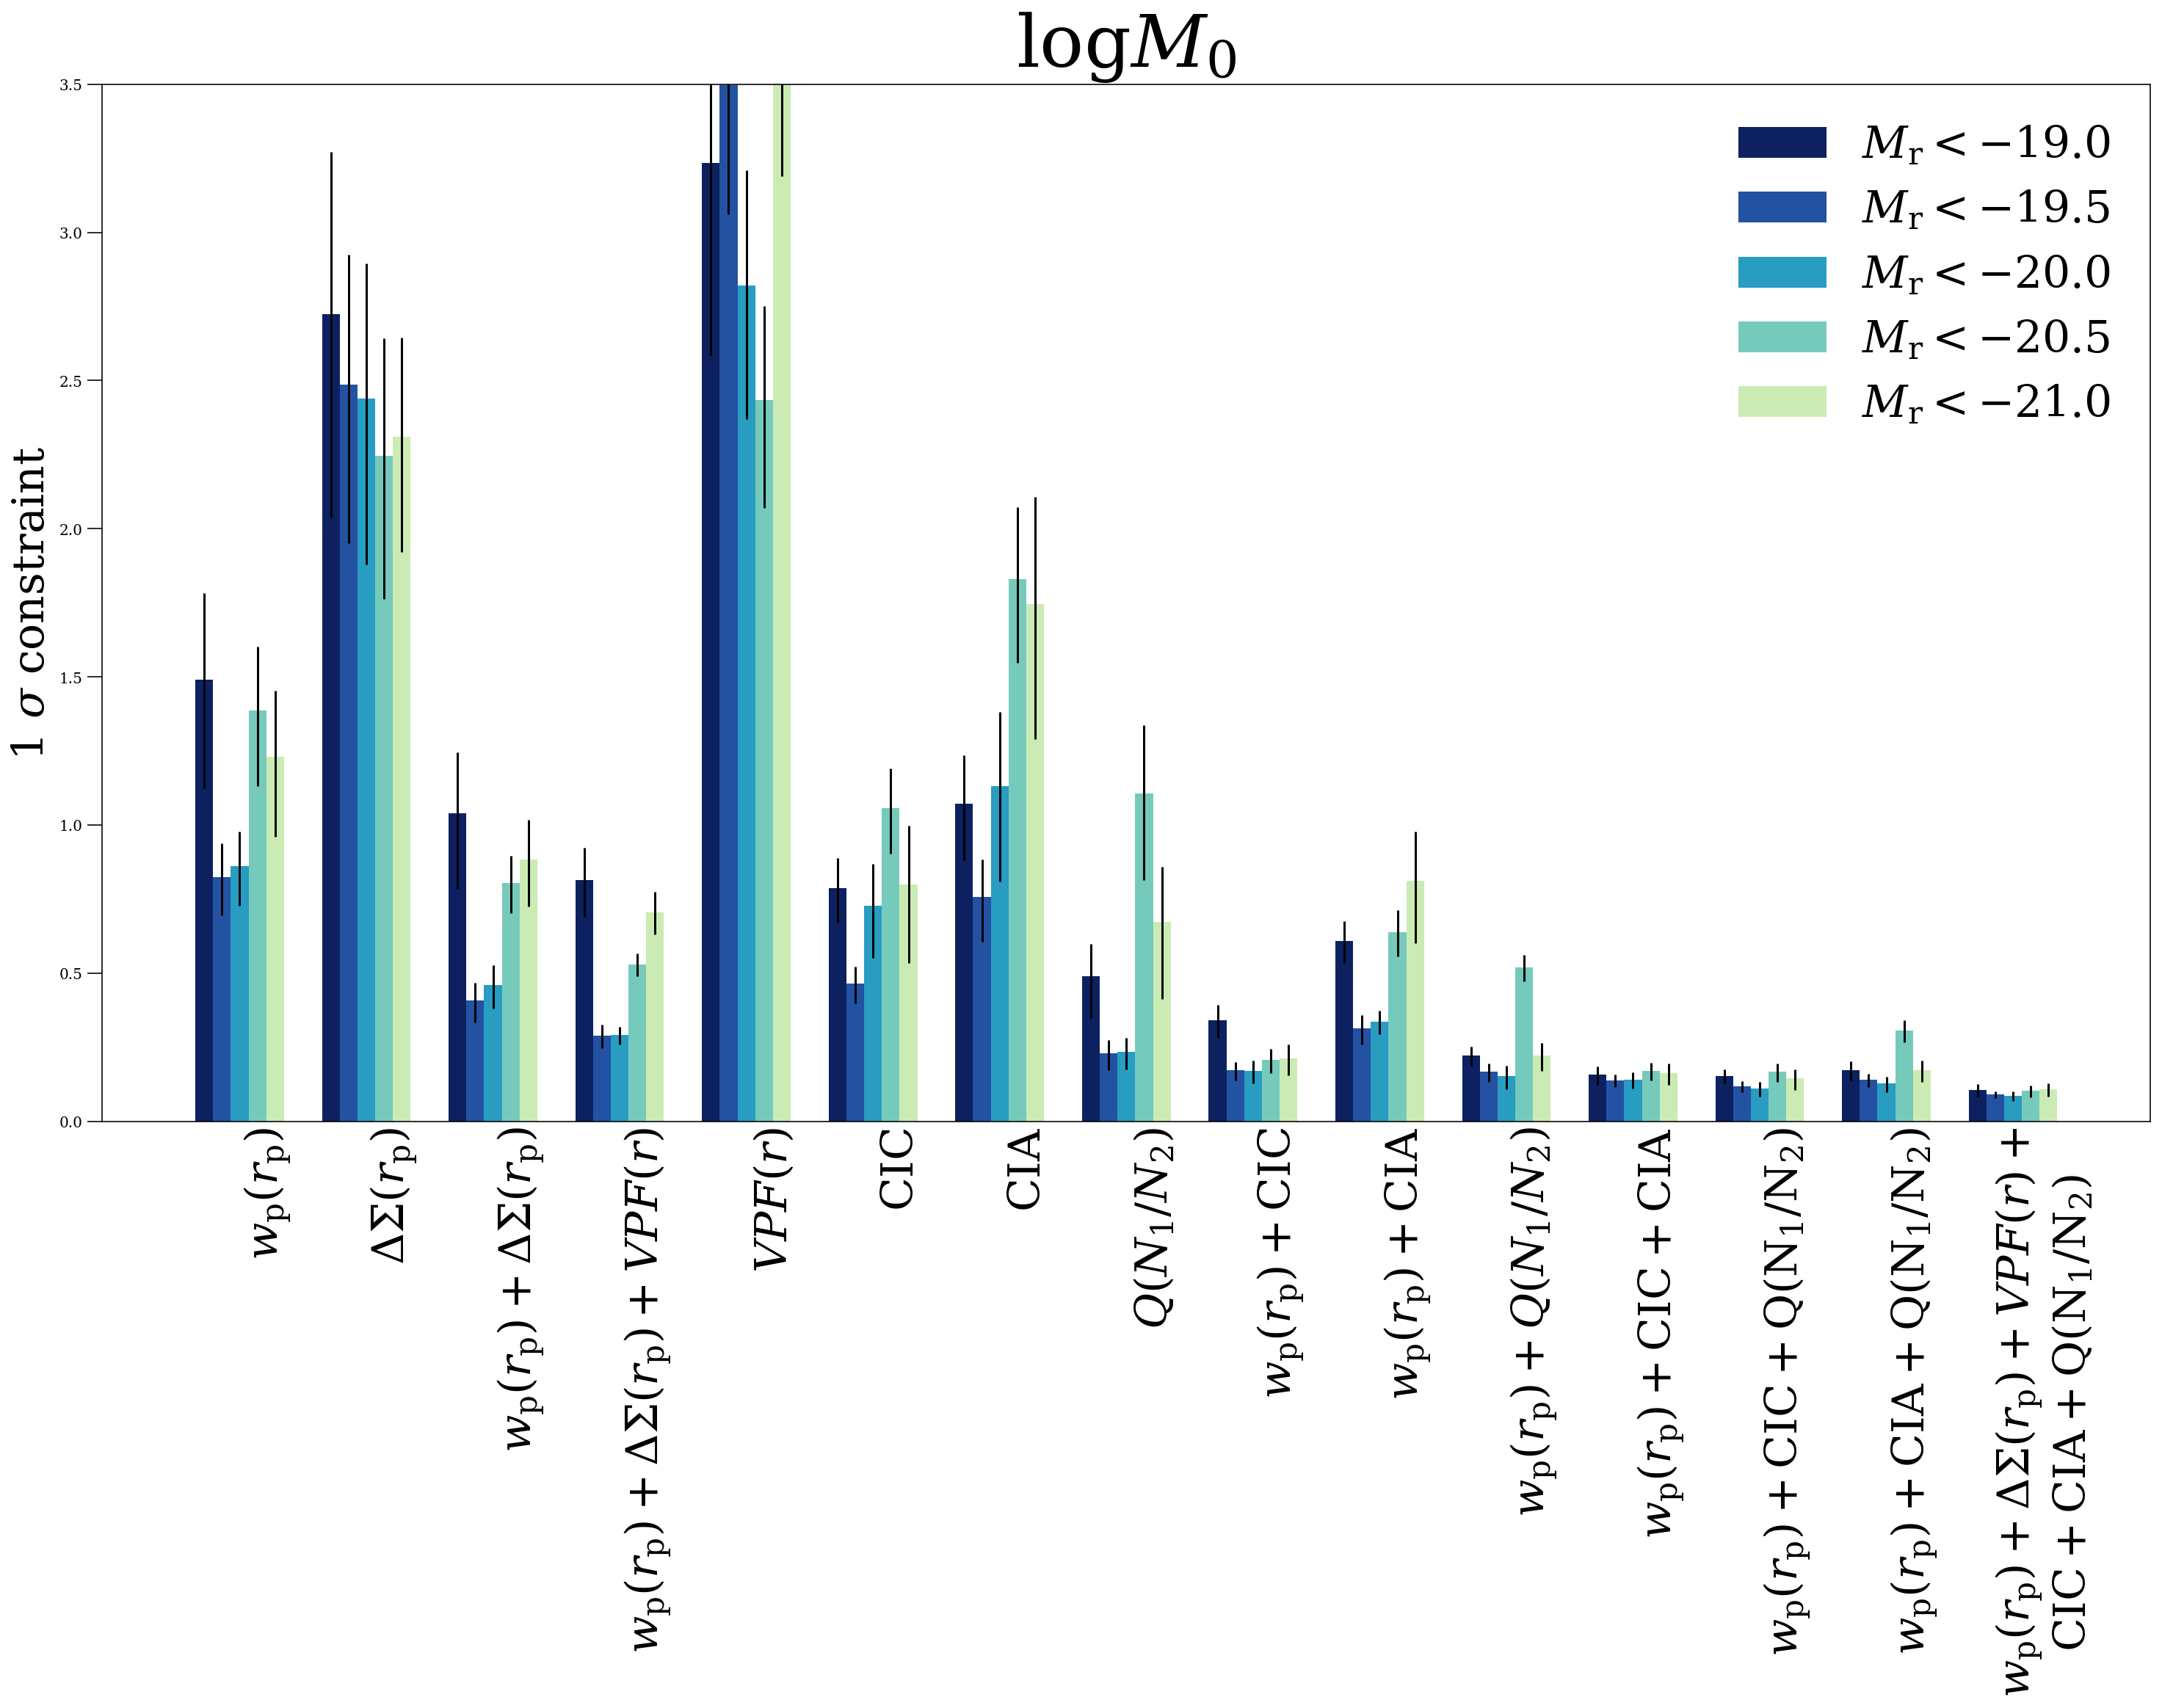

In [47]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,3], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,3],sigma_stdp_19p0[combidx,3]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,3], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,3],sigma_stdp_19p5[combidx,3]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,3], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,3],sigma_stdp_20p0[combidx,3]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,3], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,3],sigma_stdp_20p5[combidx,3]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,3], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,3],sigma_stdp_21p0[combidx,3]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[3],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,3.5)

plt.show()

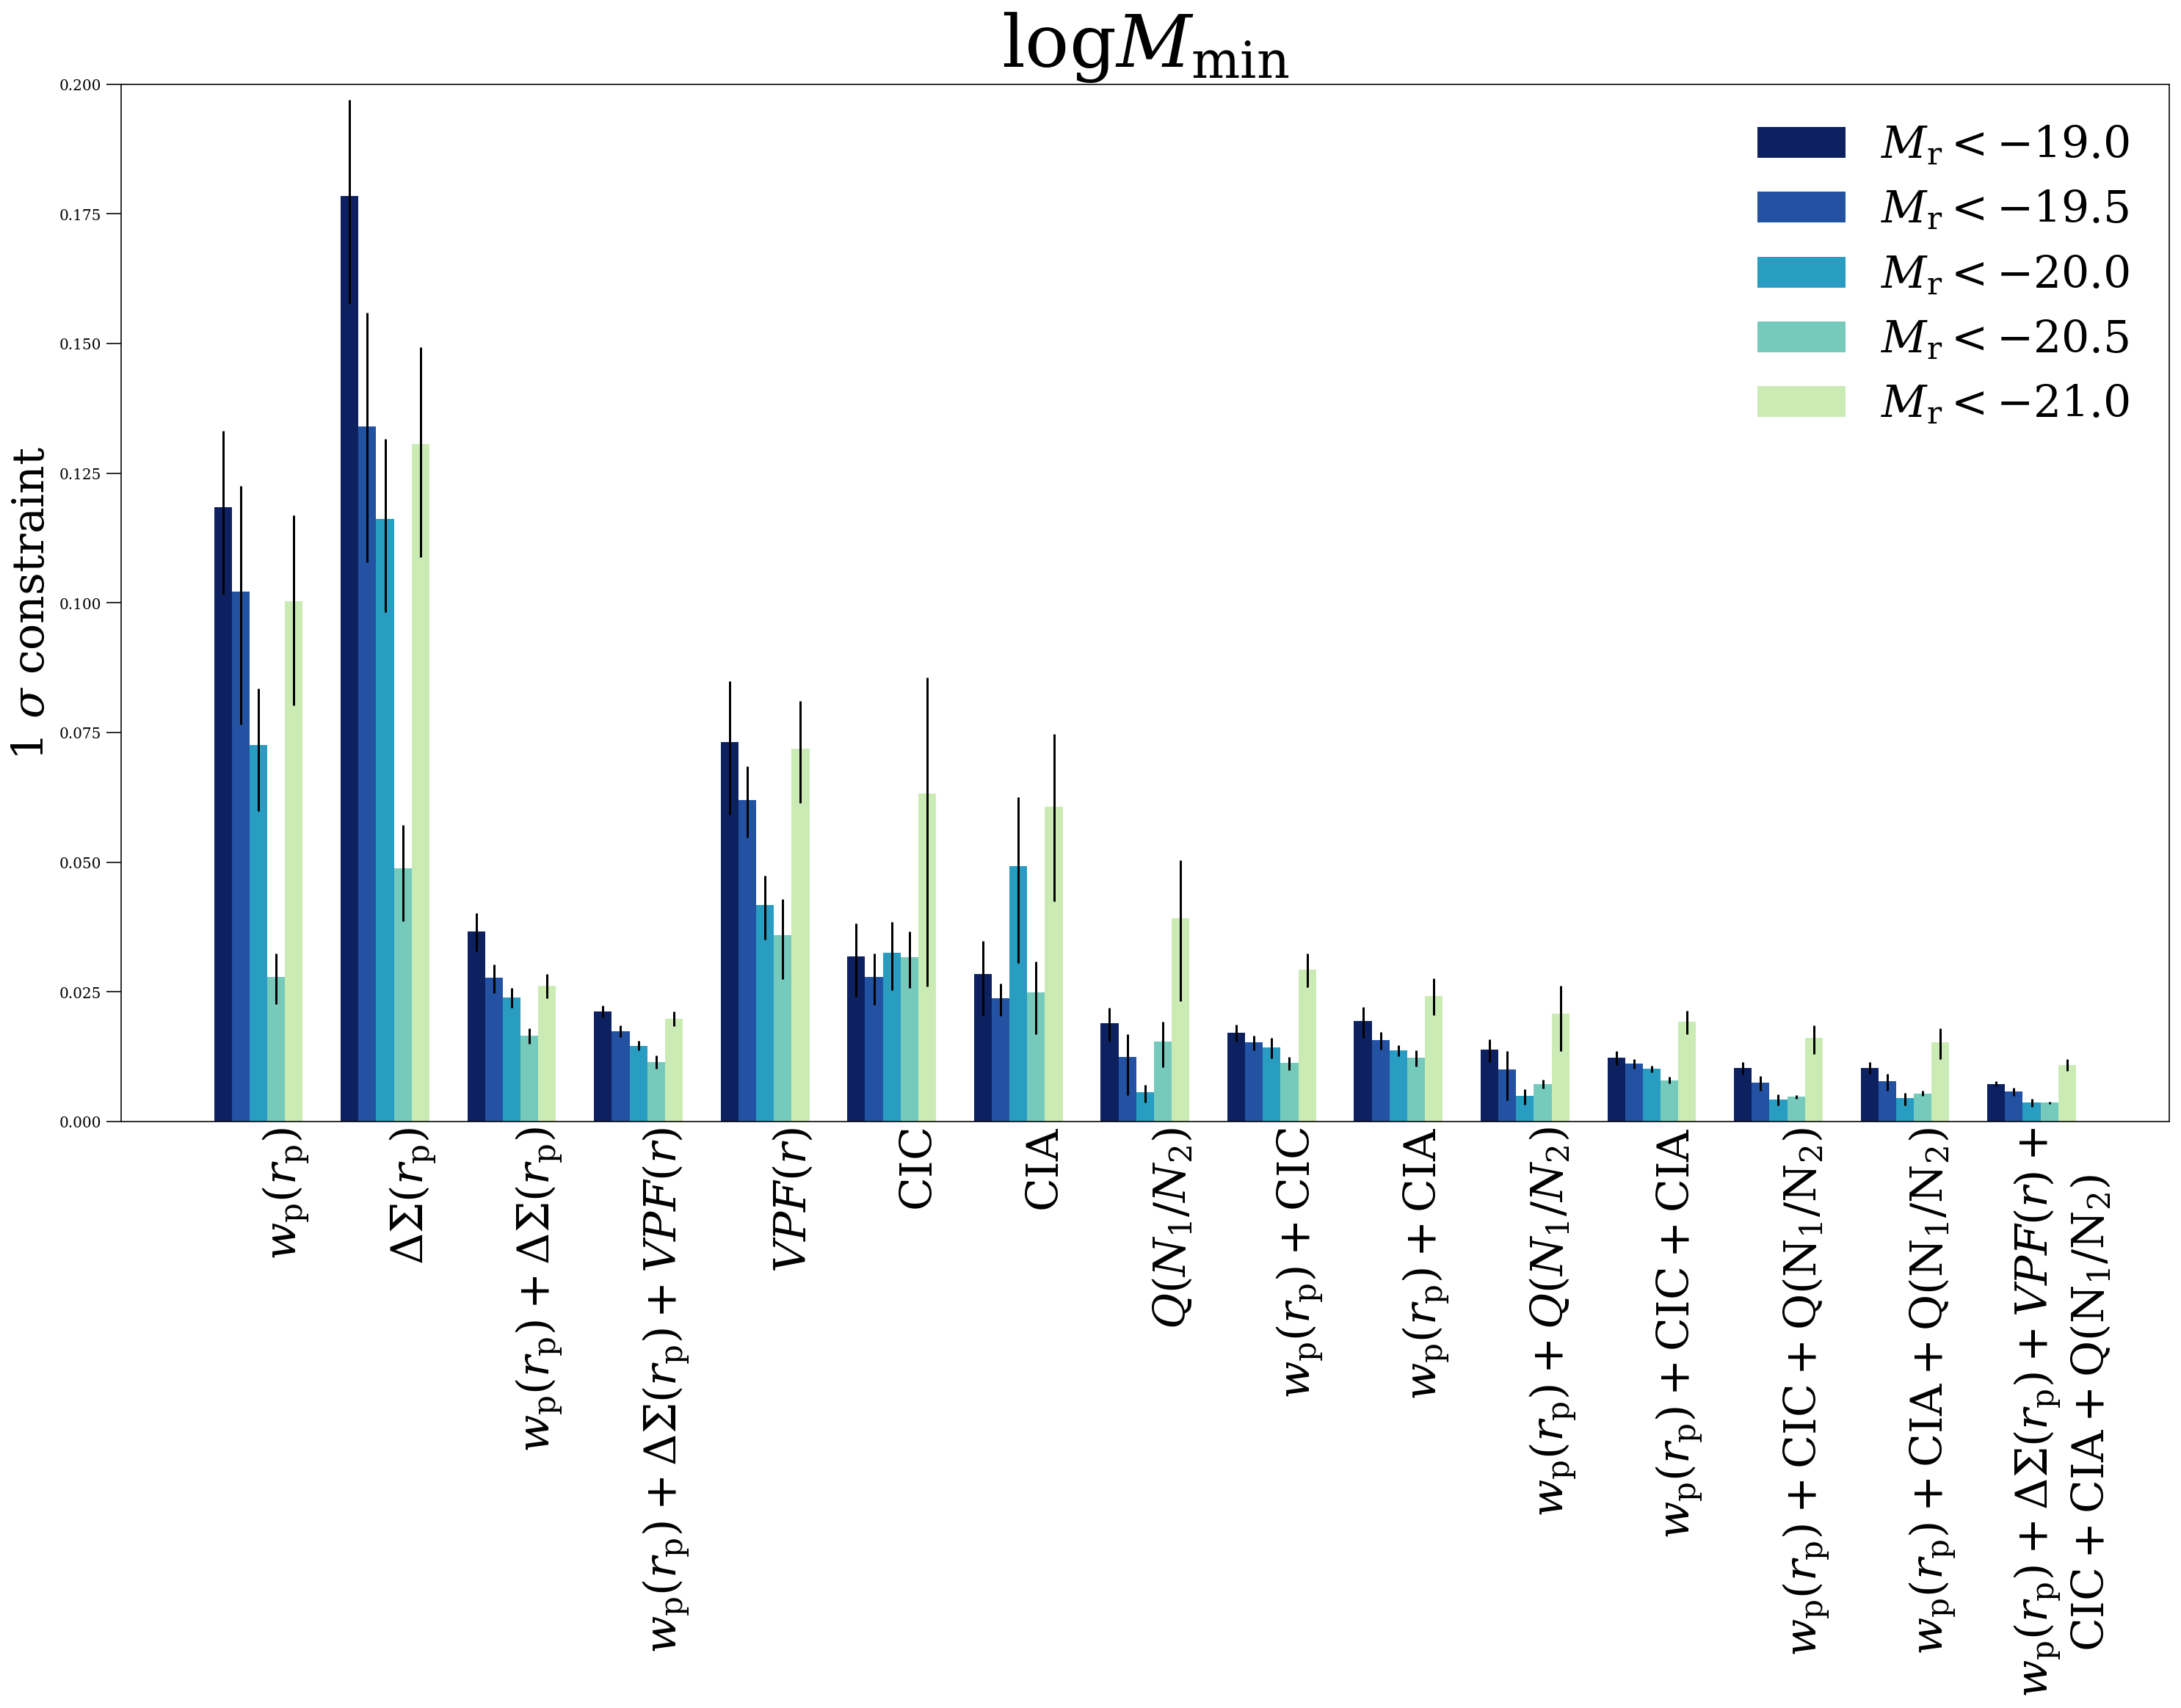

In [48]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,4], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,4],sigma_stdp_19p0[combidx,4]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,4], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,4],sigma_stdp_19p5[combidx,4]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,4], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,4],sigma_stdp_20p0[combidx,4]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,4], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,4],sigma_stdp_20p5[combidx,4]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,4], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,4],sigma_stdp_21p0[combidx,4]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[4],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.2)

plt.show()